In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import import_ipynb
import EDA_performance_yearly

# Read dataset
file_path = "Study Case DA (1).xlsx"

In [112]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)

In [113]:
strength = pd.read_excel(file_path, sheet_name="strengths")

In [114]:
# Ubah data Strength ke format wide
strength_wide = (
    strength
    .pivot(index='employee_id', columns='rank', values='theme')
    .reset_index()
)

# Ubah nama kolom agar lebih informatif
strength_wide.columns = ['employee_id'] + [f'strength_rank_{int(c)}' for c in strength_wide.columns[1:]]

# Lihat hasil
display(strength_wide.shape)
display(strength_wide.head())


(2010, 15)

employee_id    strength_rank_1 strength_rank_2 strength_rank_3  \
0     DUP1942            Learner       Maximizer        Ideation   
1     DUP2096            Command    Significance     Competition   
2     DUP2722  Individualization  Self-Assurance             NaN   
3     DUP3015     Responsibility         Context        Includer   
4     DUP3452          Developer        Arranger  Self-Assurance   

  strength_rank_4 strength_rank_5 strength_rank_6 strength_rank_7  \
0         Harmony     Restorative          Belief           Input   
1      Discipline             Woo       Activator             NaN   
2      Analytical           Input    Deliberative             NaN   
3   Communication        Ideation         Command         Learner   
4      Futuristic         Learner       Maximizer         Context   

  strength_rank_8 strength_rank_9 strength_rank_10 strength_rank_11  \
0    Significance         Empathy    Connectedness       Positivity   
1       Strategic        Ideation     Deliberative         Achiever   
2       Activator          Belief        Developer       Positivity   
3    Intellection         Empathy        Strategic     Deliberative   
4    Significance    Adaptability    Connectedness         Ideation   

  strength_rank_12   strength_rank_13 strength_rank_14  
0    Communication  Individualization              Woo  
1          Learner                NaN      Consistency  
2        Maximizer       Significance    Connectedness  
3         Arranger            Relator       Positivity  
4    Communication            Relator        Strategic

In [115]:
for year in range(2021, 2025 + 1):
    df_perf = getattr(EDA_performance_yearly, f"performance_{year}")

    globals()[f"per_behave_{year}"] = df_perf.merge(
        strength_wide,
        on="employee_id",
        how="inner"
    )


In [116]:
per_behave_2021

employee_id  rating  year    strength_rank_1    strength_rank_2  \
0      EMP100000     2.0  2021                NaN       Adaptability   
1      EMP100002     2.0  2021        Restorative          Maximizer   
2      EMP100004     3.0  2021       Deliberative            Command   
3      EMP100006     4.0  2021              Input         Analytical   
4      EMP100007     4.0  2021      Connectedness          Strategic   
5      EMP100008     5.0  2021                NaN           Ideation   
6      EMP100010     2.0  2021          Activator           Includer   
7      EMP100011     3.0  2021            Empathy       Intellection   
8      EMP100014     2.0  2021            Empathy          Maximizer   
9      EMP100015     3.0  2021        Restorative         Analytical   
10     EMP100016     2.0  2021       Adaptability            Relator   
11     EMP100017     3.0  2021  Individualization         Positivity   
12     EMP100018     3.0  2021            Harmony           Arranger   
13     EMP100019     4.0  2021          Strategic         Discipline   
14     EMP100020     3.0  2021           Includer            Command   
15     EMP100021     5.0  2021       Significance          Activator   
16     EMP100022     4.0  2021         Discipline     Self-Assurance   
17     EMP100023     3.0  2021           Arranger          Strategic   
18     EMP100024     3.0  2021      Connectedness       Adaptability   
19     EMP100026     3.0  2021        Competition            Harmony   
20     EMP100029     4.0  2021          Maximizer           Ideation   
21     EMP100030     1.0  2021        Restorative     Responsibility   
22     EMP100031     4.0  2021          Maximizer           Arranger   
23     EMP100032     3.0  2021          Maximizer            Learner   
24     EMP100033     3.0  2021         Futuristic         Discipline   
25     EMP100034     3.0  2021           Achiever     Self-Assurance   
26     EMP100035     2.0  2021            Command           Includer   
27     EMP100036     3.0  2021                Woo       Deliberative   
28     EMP100037     1.0  2021      Connectedness     Responsibility   
29     EMP100038     4.0  2021             Belief            Empathy   
30     EMP100039     4.0  2021         Futuristic          Developer   
31     EMP100040     1.0  2021         Discipline     Self-Assurance   
32     EMP100041     1.0  2021       Intellection      Connectedness   
33     EMP100042     1.0  2021            Command       Adaptability   
34     EMP100043     5.0  2021            Learner  Individualization   
35     EMP100045     2.0  2021           Ideation         Positivity   
36     EMP100046     3.0  2021       Adaptability            Empathy   
37     EMP100047     4.0  2021        Competition           Includer   
38     EMP100048     3.0  2021            Relator            Context   
39     EMP100049     5.0  2021           Achiever                NaN   
40     EMP100050     2.0  2021                NaN        Competition   
41     EMP100051     4.0  2021         Analytical          Developer   
42     EMP100053     5.0  2021     Self-Assurance         Positivity   
43     EMP100055     4.0  2021         Discipline              Input   
44     EMP100056     5.0  2021           Achiever            Command   
45     EMP100057     3.0  2021            Empathy          Maximizer   
46     EMP100058     3.0  2021     Self-Assurance            Empathy   
47     EMP100059     1.0  2021          Activator      Connectedness   
48     EMP100060     4.0  2021       Deliberative          Activator   
49     EMP100062     4.0  2021            Learner  Individualization   
50     EMP100063     5.0  2021                NaN                Woo   
51     EMP100064     4.0  2021         Futuristic           Ideation   
52     EMP100065     4.0  2021            Harmony              Focus   
53     EMP100066     3.0  2021           Ideation                NaN   
54     EMP100067     3.0  2021       Intellec

In [117]:
dfs = [
    (per_behave_2021, 2021),
    (per_behave_2022, 2022),
    (per_behave_2023, 2023),
    (per_behave_2024, 2024),
    (per_behave_2025, 2025),
]

for df, year in dfs:
    # tambahkan kolom is_high
    df['is_high'] = (df['rating'] == 5).astype(int)

In [118]:
per_behave_2023

employee_id  rating  year    strength_rank_1    strength_rank_2  \
0      EMP100000     1.0  2023                NaN       Adaptability   
1      EMP100001     4.0  2023     Responsibility           Includer   
2      EMP100002     3.0  2023        Restorative          Maximizer   
3      EMP100003     2.0  2023             Belief       Intellection   
4      EMP100004     4.0  2023       Deliberative            Command   
5      EMP100005     1.0  2023              Input            Relator   
6      EMP100006     3.0  2023              Input         Analytical   
7      EMP100007     3.0  2023      Connectedness          Strategic   
8      EMP100008     2.0  2023                NaN           Ideation   
9      EMP100009     3.0  2023         Analytical          Developer   
10     EMP100010     1.0  2023          Activator           Includer   
11     EMP100011     2.0  2023            Empathy       Intellection   
12     EMP100012     4.0  2023             Belief            Empathy   
13     EMP100013     3.0  2023                NaN        Consistency   
14     EMP100014     4.0  2023            Empathy          Maximizer   
15     EMP100015     4.0  2023        Restorative         Analytical   
16     EMP100016     4.0  2023       Adaptability            Relator   
17     EMP100017     2.0  2023  Individualization         Positivity   
18     EMP100018     3.0  2023            Harmony           Arranger   
19     EMP100019     3.0  2023          Strategic         Discipline   
20     EMP100020     4.0  2023           Includer            Command   
21     EMP100021     4.0  2023       Significance          Activator   
22     EMP100022     1.0  2023         Discipline     Self-Assurance   
23     EMP100023     1.0  2023           Arranger          Strategic   
24     EMP100024     3.0  2023      Connectedness       Adaptability   
25     EMP100025     4.0  2023       Adaptability            Relator   
26     EMP100026     2.0  2023        Competition            Harmony   
27     EMP100027     3.0  2023         Discipline           Includer   
28     EMP100028     3.0  2023       Deliberative       Significance   
29     EMP100029     3.0  2023          Maximizer           Ideation   
30     EMP100030     3.0  2023        Restorative     Responsibility   
31     EMP100031     5.0  2023          Maximizer           Arranger   
32     EMP100032     3.0  2023          Maximizer            Learner   
33     EMP100033     3.0  2023         Futuristic         Discipline   
34     EMP100034     5.0  2023           Achiever     Self-Assurance   
35     EMP100035     3.0  2023            Command           Includer   
36     EMP100036     3.0  2023                Woo       Deliberative   
37     EMP100037     3.0  2023      Connectedness     Responsibility   
38     EMP100038     3.0  2023             Belief            Empathy   
39     EMP100039     4.0  2023         Futuristic          Developer   
40     EMP100040     1.0  2023         Discipline     Self-Assurance   
41     EMP100041     3.0  2023       Intellection      Connectedness   
42     EMP100042     4.0  2023            Command       Adaptability   
43     EMP100043     3.0  2023            Learner  Individualization   
44     EMP100044     3.0  2023              Focus      Communication   
45     EMP100045     3.0  2023           Ideation         Positivity   
46     EMP100046     4.0  2023       Adaptability            Empathy   
47     EMP100047     3.0  2023        Competition           Includer   
48     EMP100048     2.0  2023            Relator            Context   
49     EMP100050     4.0  2023                NaN        Competition   
50     EMP100051     1.0  2023         Analytical          Developer   
51     EMP100052     4.0  2023                NaN     Responsibility   
52     EMP100054     3.0  2023           Includer          Maximizer   
53     EMP100055     4.0  2023         Discipline              Input   
54     EMP100056     3.0  2023           Achi

In [119]:
import pandas as pd

# Kolom strength rank
rank_cols = [f"strength_rank_{i}" for i in range(1, 15)]

# Bobot berdasarkan ranking
weights = {f"strength_rank_{i}": 15 - i for i in range(1, 15)}  # 1→14, 2→13 ... 14→1


def weighted_strength_by_year(df):
    """
    Menghitung total bobot per tema per kelompok (high vs other)
    untuk satu tahun saja.
    """
    # wide → long
    melted = df.melt(
        id_vars=['employee_id', 'is_high'],
        value_vars=rank_cols,
        var_name='rank_col',
        value_name='theme'
    ).dropna(subset=['theme'])

    # tambahkan bobot
    melted['weight'] = melted['rank_col'].map(weights)

    # hitung jumlah bobot per tema per kelompok
    weighted = (
        melted.groupby(['is_high', 'theme'])['weight']
        .sum()
        .reset_index()
        .sort_values(['is_high', 'weight'], ascending=[False, False])
    )

    return weighted


# ============================
#  HITUNG UNTUK 5 TAHUN
# ============================

weighted_strength_2021 = weighted_strength_by_year(per_behave_2021)
weighted_strength_2022 = weighted_strength_by_year(per_behave_2022)
weighted_strength_2023 = weighted_strength_by_year(per_behave_2023)
weighted_strength_2024 = weighted_strength_by_year(per_behave_2024)
weighted_strength_2025 = weighted_strength_by_year(per_behave_2025)


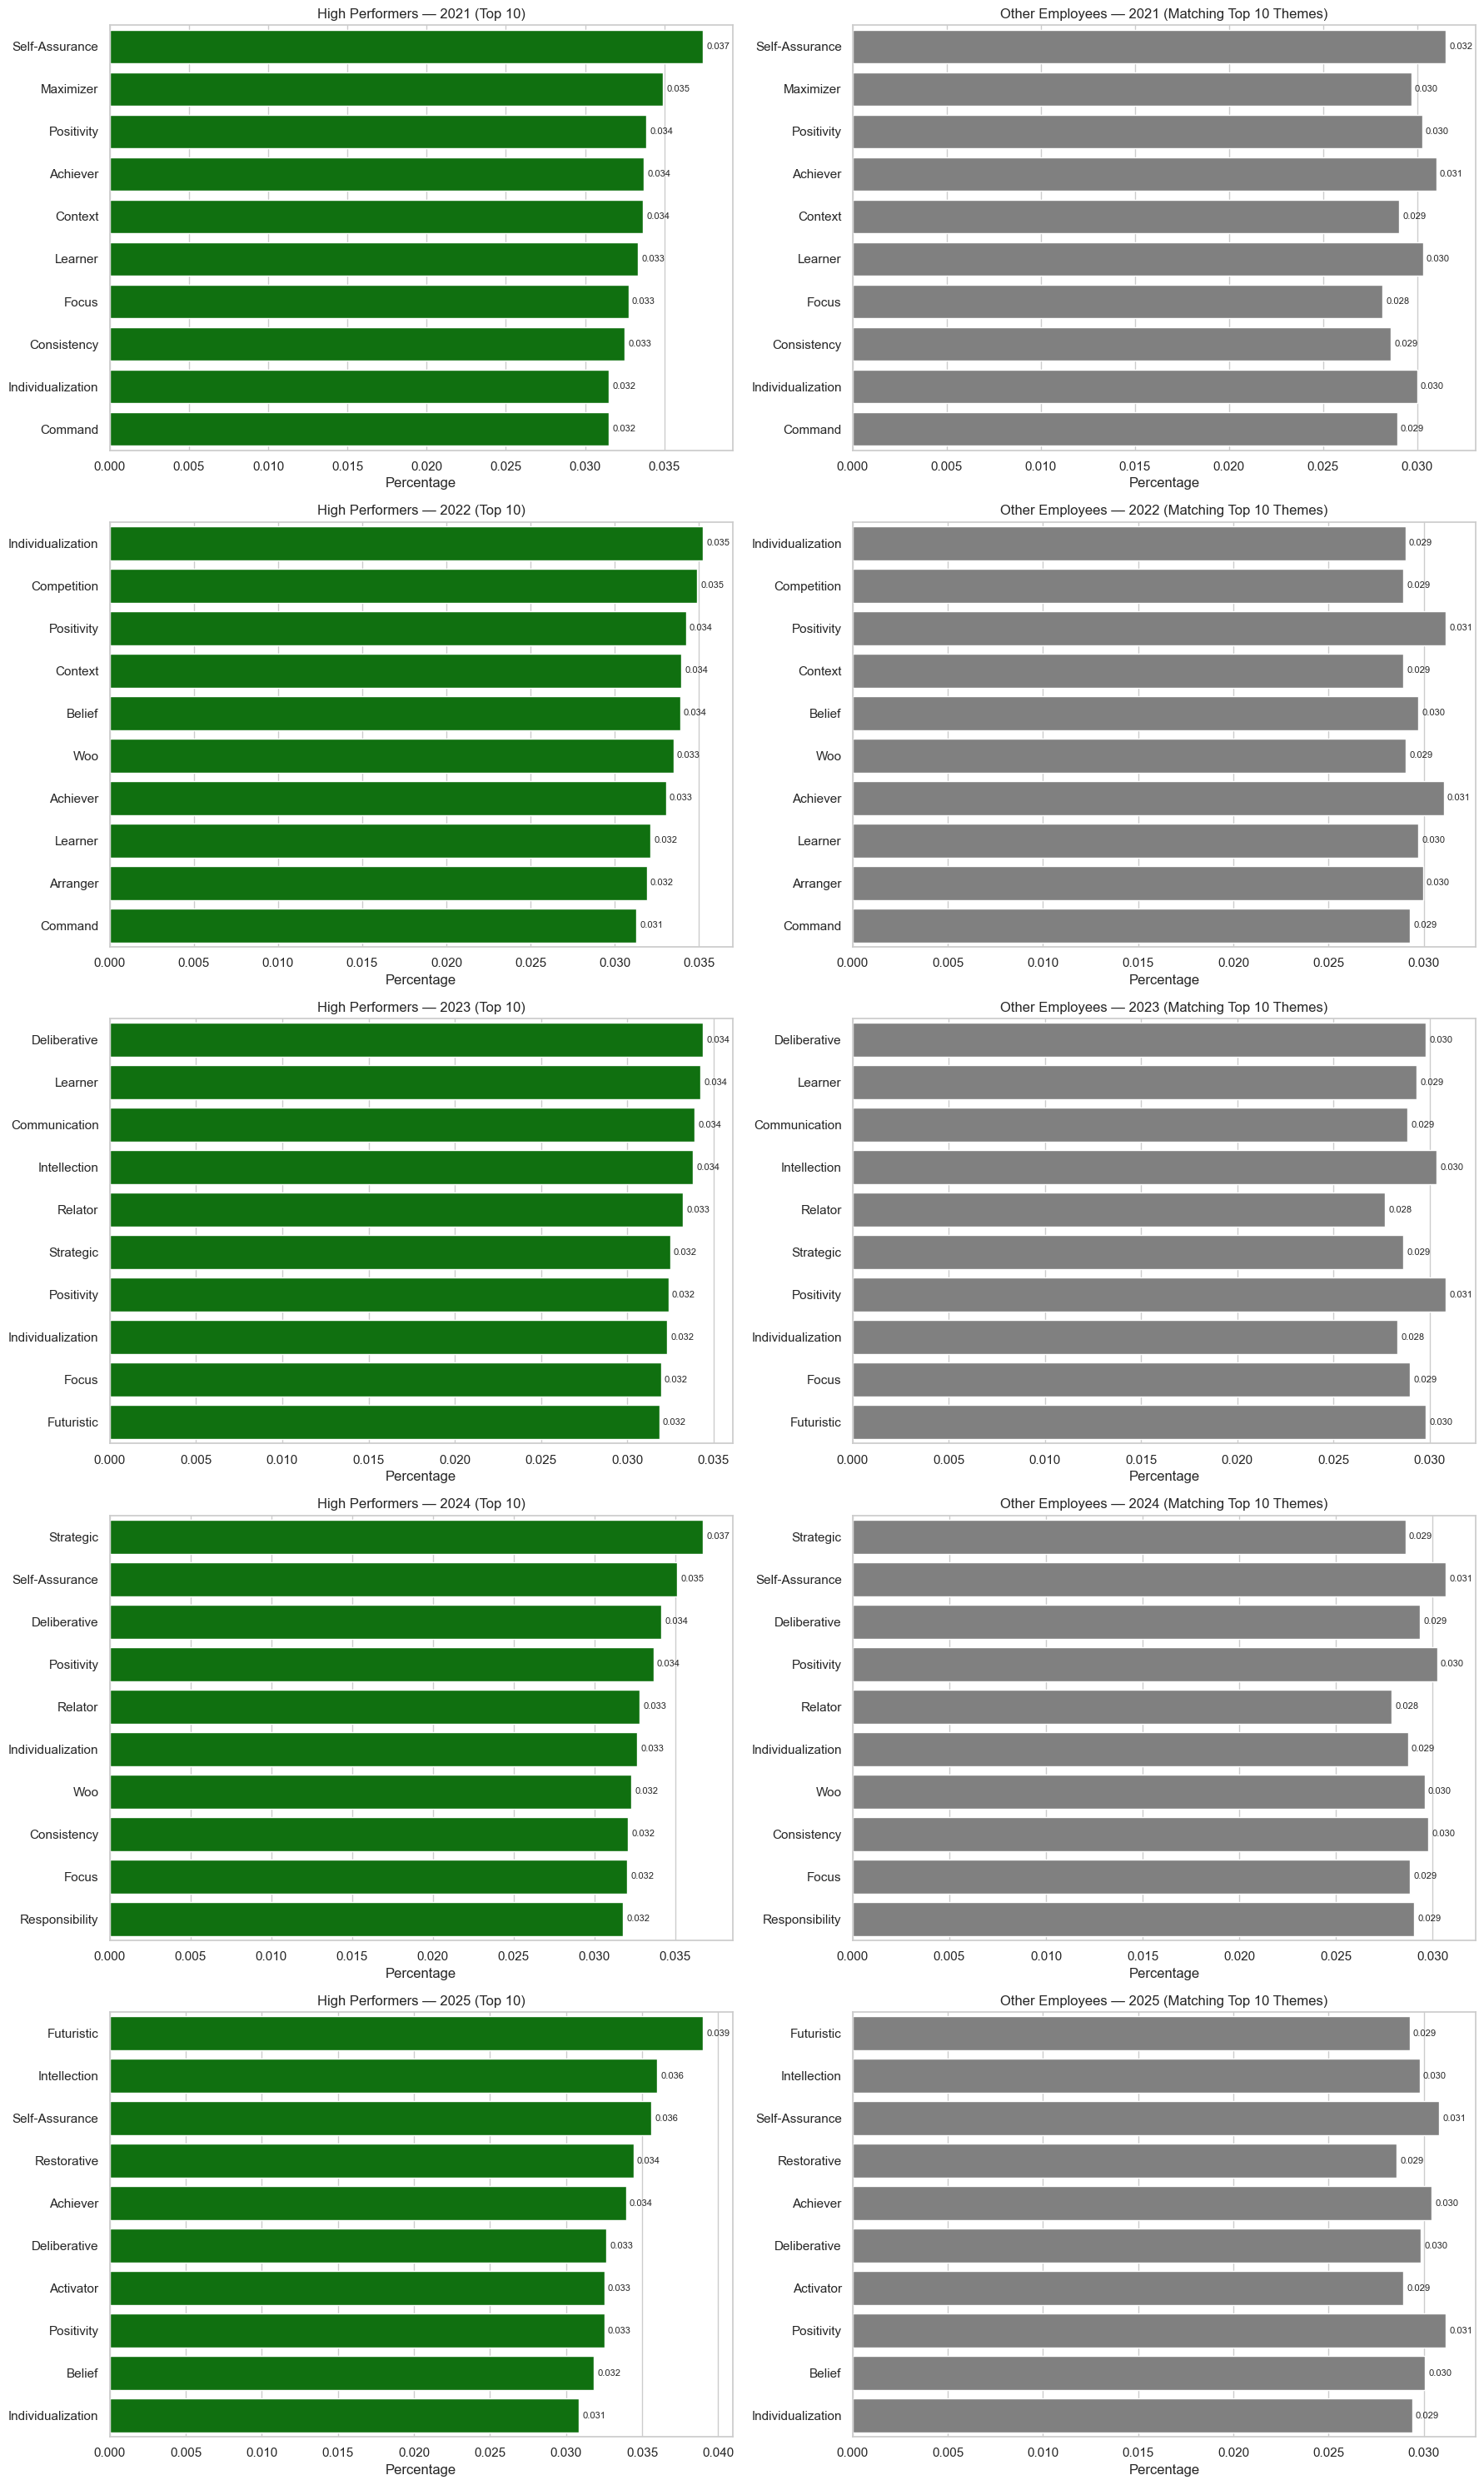

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_all_years_top10(weighted_dict):
    """
    weighted_dict = {
        2021: weighted_strength_2021,
        2022: weighted_strength_2022,
        ...
    }
    Hanya menampilkan TOP 10 themes untuk High Performers
    """

    n_years = len(weighted_dict)
    fig, axes = plt.subplots(n_years, 2, figsize=(18, 6 * n_years), sharey=False)

    if n_years == 1:
        axes = [axes]  # normalize shape

    for i, (year, df_weighted) in enumerate(weighted_dict.items()):
        
        # HITUNG TOTAL BOBOT PER KELOMPOK
        total_high = df_weighted[df_weighted["is_high"] == 1]["weight"].sum()
        total_other = df_weighted[df_weighted["is_high"] == 0]["weight"].sum()

        # BUAT KOLOM PERSENTASE
        df_weighted["pct"] = df_weighted.apply(
            lambda row: row["weight"] / (total_high if row["is_high"] == 1 else total_other)
            if (total_high if row["is_high"] == 1 else total_other) != 0 else 0,
            axis=1
        )

        # FILTER DATA DAN AMBIL TOP 10 HIGH PERFORMERS
        df_high = df_weighted[df_weighted["is_high"] == 1].sort_values("pct", ascending=False)
        df_high_top10 = df_high.head(10)  # AMBIL TOP 10 SAJA
        
        # URUTAN THEME BERDASARKAN TOP 10 HIGH
        ordered_themes = df_high_top10["theme"].tolist()
        
        # FILTER OTHER EMPLOYEES HANYA UNTUK THEME YANG ADA DI TOP 10
        df_other = df_weighted[
            (df_weighted["is_high"] == 0) & 
            (df_weighted["theme"].isin(ordered_themes))
        ]
        
        # URUTKAN OTHER SESUAI URUTAN HIGH
        df_other["theme"] = pd.Categorical(df_other["theme"], ordered_themes, ordered=True)
        df_other = df_other.sort_values("theme")

        # PANEL KIRI — HIGH (TOP 10)
        sns.barplot(
            data=df_high_top10,
            y="theme", x="pct",
            ax=axes[i][0], color="green"
        )
        axes[i][0].set_title(f"High Performers — {year} (Top 10)")
        axes[i][0].set_xlabel("Percentage")
        axes[i][0].set_ylabel("")

        # PANEL KANAN — OTHER (HANYA THEME YANG ADA DI TOP 10)
        sns.barplot(
            data=df_other,
            y="theme", x="pct",
            ax=axes[i][1], color="gray"
        )
        axes[i][1].set_title(f"Other Employees — {year} (Matching Top 10 Themes)")
        axes[i][1].set_xlabel("Percentage")
        axes[i][1].set_ylabel("")
        
        # Tambahkan nilai persentase pada bar
        for ax in [axes[i][0], axes[i][1]]:
            for container in ax.containers:
                ax.bar_label(container, fmt='%.3f', padding=3, fontsize=8)
        
    plt.tight_layout()
    plt.show()


# =============================
#  PANGGIL UNTUK SEMUA TAHUN
# =============================
plot_all_years_top10({
    2021: weighted_strength_2021,
    2022: weighted_strength_2022,
    2023: weighted_strength_2023,
    2024: weighted_strength_2024,
    2025: weighted_strength_2025
})

Data untuk rank 1-3 telah disimpan ke variabel:
- weighted_strength_2021_rank123
- weighted_strength_2022_rank123
- weighted_strength_2023_rank123
- weighted_strength_2024_rank123
- weighted_strength_2025_rank123


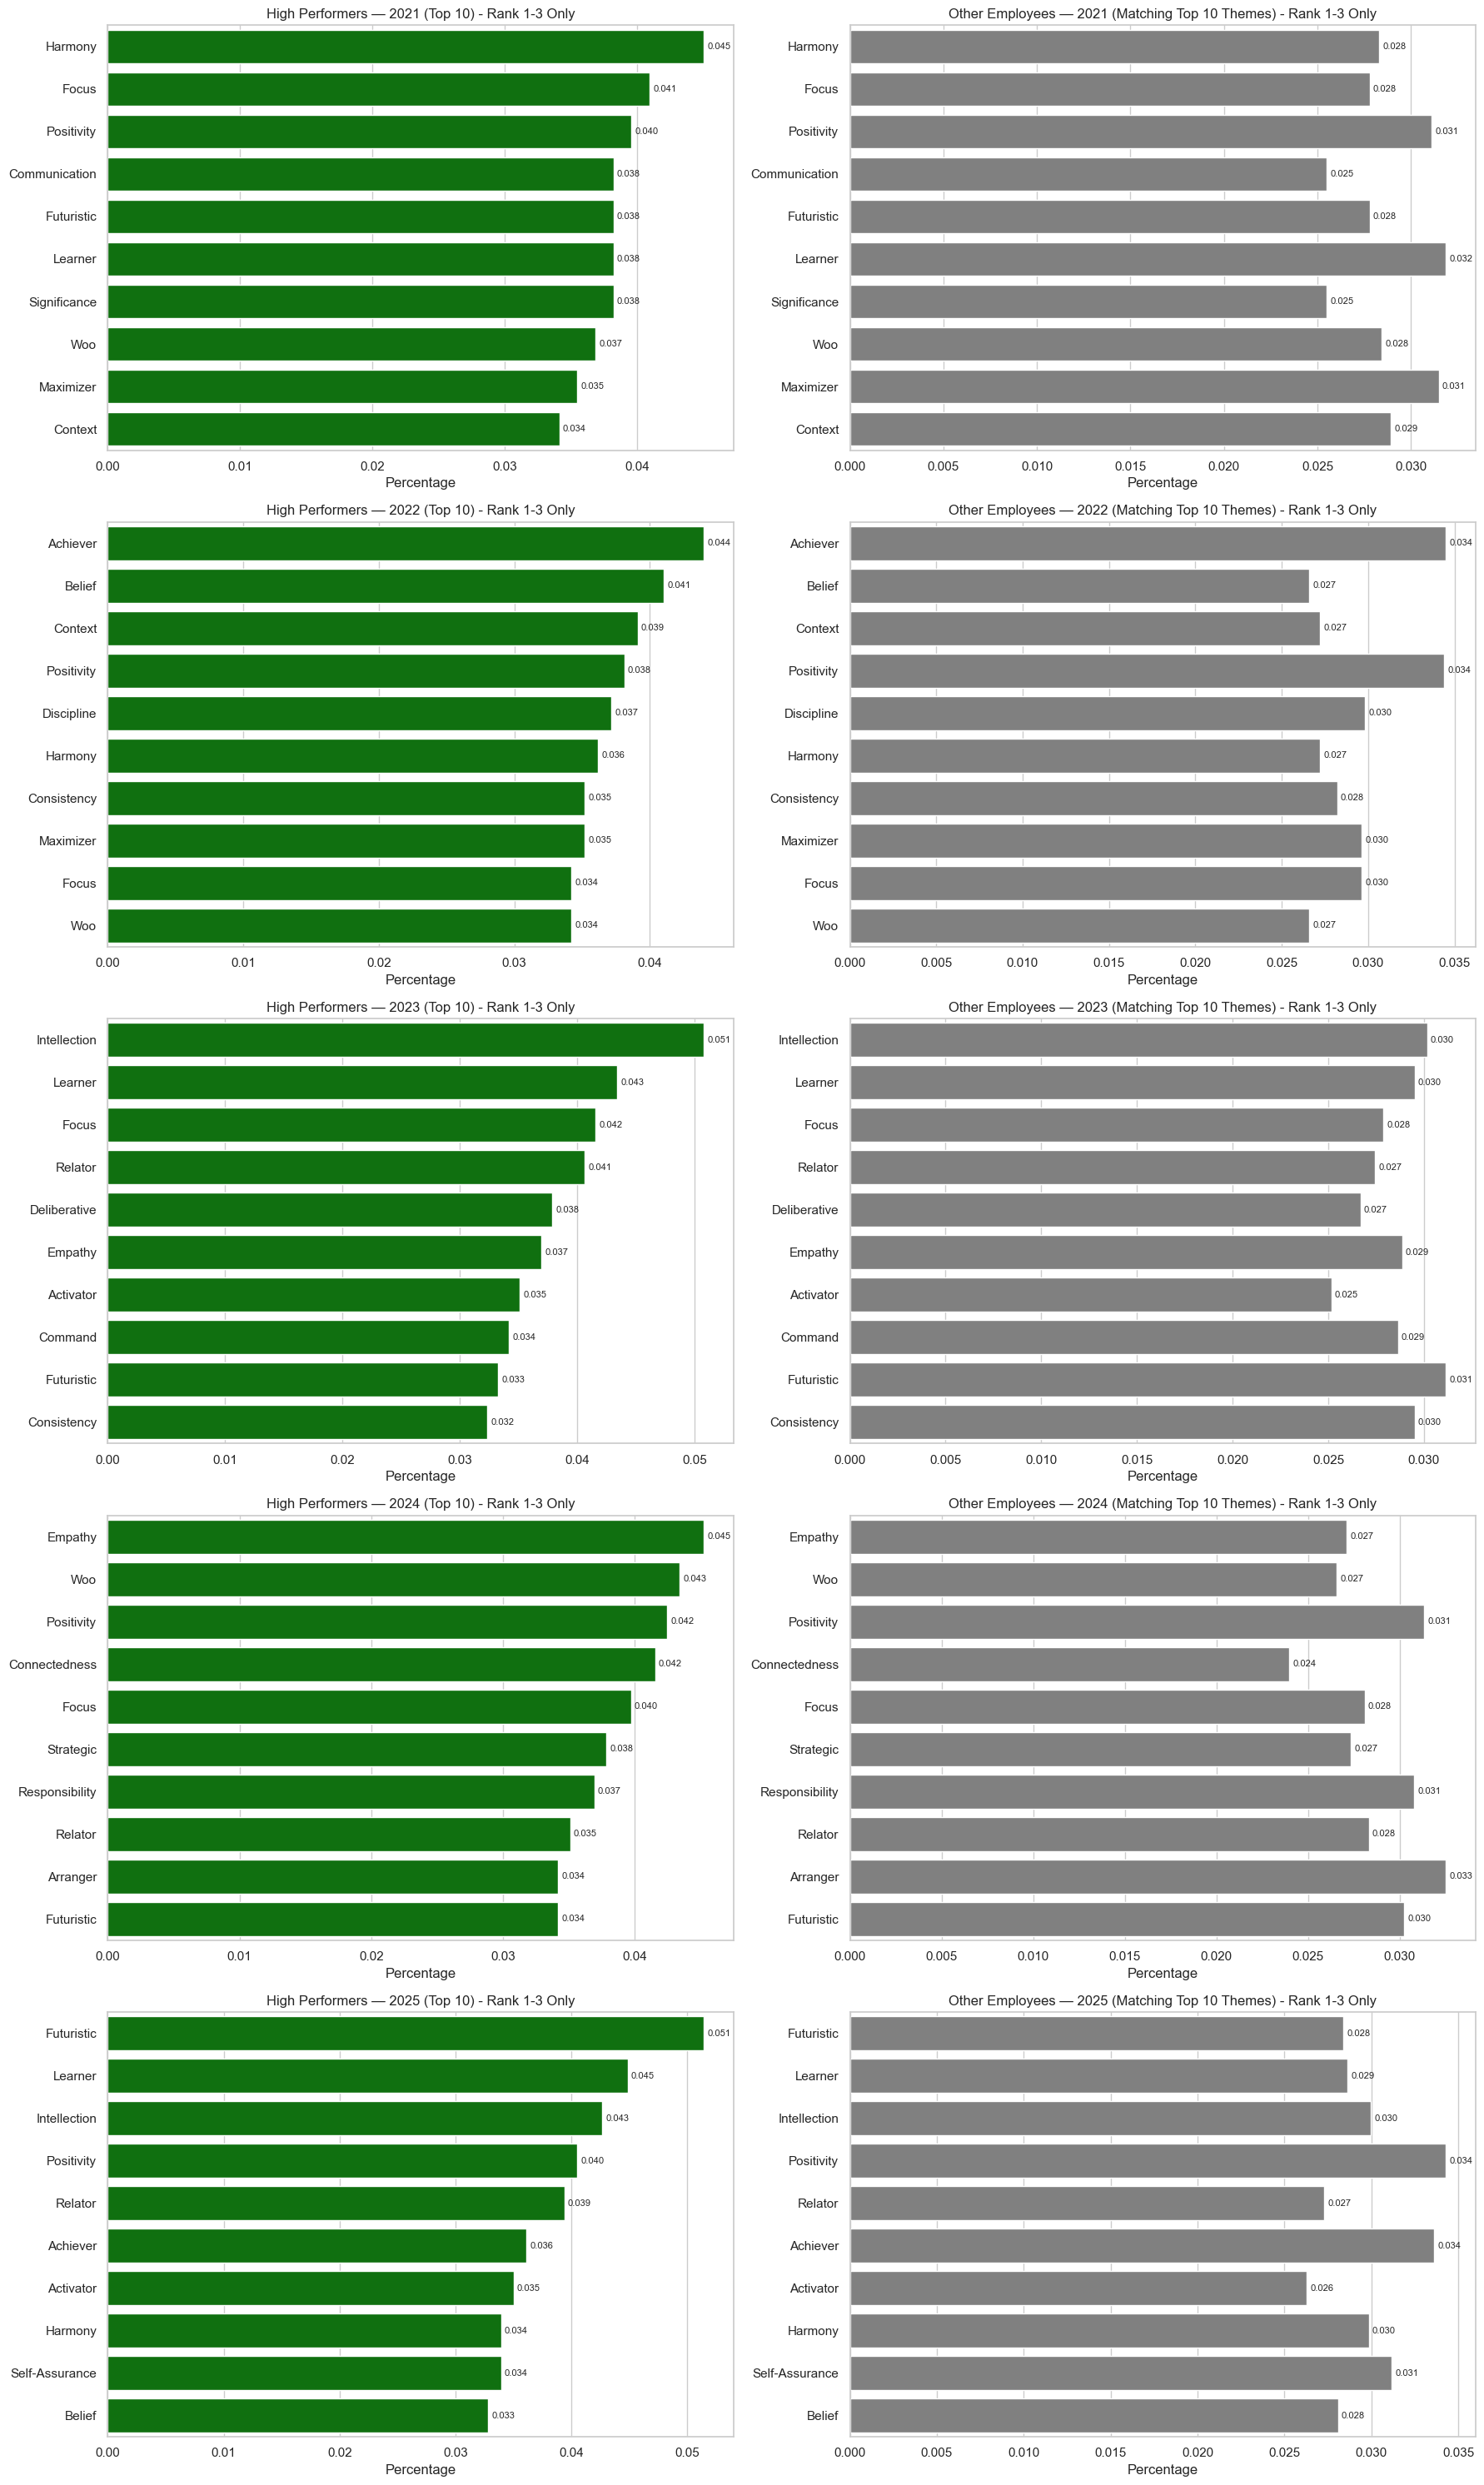

=== COMPARISON: RANK 1-3 vs ALL RANKS ===

2021:
  Rank 1-3 Top 5: ['Harmony', 'Focus', 'Positivity', 'Communication', 'Futuristic']
  All Ranks Top 5: ['Self-Assurance', 'Maximizer', 'Positivity', 'Achiever', 'Context']
  Overlap: 1 themes

2022:
  Rank 1-3 Top 5: ['Achiever', 'Belief', 'Context', 'Positivity', 'Discipline']
  All Ranks Top 5: ['Individualization', 'Competition', 'Positivity', 'Context', 'Belief']
  Overlap: 3 themes

2023:
  Rank 1-3 Top 5: ['Intellection', 'Learner', 'Focus', 'Relator', 'Deliberative']
  All Ranks Top 5: ['Deliberative', 'Learner', 'Communication', 'Intellection', 'Relator']
  Overlap: 4 themes

2024:
  Rank 1-3 Top 5: ['Empathy', 'Woo', 'Positivity', 'Connectedness', 'Focus']
  All Ranks Top 5: ['Strategic', 'Self-Assurance', 'Deliberative', 'Positivity', 'Relator']
  Overlap: 1 themes

2025:
  Rank 1-3 Top 5: ['Futuristic', 'Learner', 'Intellection', 'Positivity', 'Relator']
  All Ranks Top 5: ['Futuristic', 'Intellection', 'Self-Assurance', 'Rest

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# KONFIGURASI - HANYA RANK 1-3
# =============================================================================

# Hanya kolom strength rank 1-3 saja
rank_cols = [f"strength_rank_{i}" for i in range(1, 4)]  # Hanya rank 1, 2, 3

# Bobot berdasarkan ranking (hanya untuk rank 1-3)
weights = {
    "strength_rank_1": 3,  # Bobot tertinggi
    "strength_rank_2": 2,  # Bobot menengah  
    "strength_rank_3": 1   # Bobot terendah
}

def weighted_strength_by_year_rank1to3(df):
    """
    Menghitung total bobot per tema per kelompok (high vs other)
    HANYA menggunakan rank 1-3
    """
    # wide → long (hanya untuk rank 1-3)
    melted = df.melt(
        id_vars=['employee_id', 'is_high'],
        value_vars=rank_cols,  # Hanya rank 1-3
        var_name='rank_col',
        value_name='theme'
    ).dropna(subset=['theme'])

    # tambahkan bobot
    melted['weight'] = melted['rank_col'].map(weights)

    # hitung jumlah bobot per tema per kelompok
    weighted = (
        melted.groupby(['is_high', 'theme'])['weight']
        .sum()
        .reset_index()
        .sort_values(['is_high', 'weight'], ascending=[False, False])
    )

    return weighted

# =============================================================================
# HITUNG UNTUK 5 TAHUN - RANK 1-3 SAJA
# =============================================================================

# Simpan ke variabel berbeda dengan suffix _rank123
weighted_strength_2021_rank123 = weighted_strength_by_year_rank1to3(per_behave_2021)
weighted_strength_2022_rank123 = weighted_strength_by_year_rank1to3(per_behave_2022) 
weighted_strength_2023_rank123 = weighted_strength_by_year_rank1to3(per_behave_2023)
weighted_strength_2024_rank123 = weighted_strength_by_year_rank1to3(per_behave_2024)
weighted_strength_2025_rank123 = weighted_strength_by_year_rank1to3(per_behave_2025)

print("Data untuk rank 1-3 telah disimpan ke variabel:")
print("- weighted_strength_2021_rank123")
print("- weighted_strength_2022_rank123") 
print("- weighted_strength_2023_rank123")
print("- weighted_strength_2024_rank123")
print("- weighted_strength_2025_rank123")

# =============================================================================
# VISUALISASI - RANK 1-3 SAJA
# =============================================================================

def plot_all_years_top10_rank123(weighted_dict):
    """
    Visualisasi untuk data rank 1-3 saja
    weighted_dict = {
        2021: weighted_strength_2021_rank123,
        2022: weighted_strength_2022_rank123,
        ...
    }
    """

    n_years = len(weighted_dict)
    fig, axes = plt.subplots(n_years, 2, figsize=(18, 6 * n_years), sharey=False)

    if n_years == 1:
        axes = [axes]  # normalize shape

    for i, (year, df_weighted) in enumerate(weighted_dict.items()):
        
        # HITUNG TOTAL BOBOT PER KELOMPOK
        total_high = df_weighted[df_weighted["is_high"] == 1]["weight"].sum()
        total_other = df_weighted[df_weighted["is_high"] == 0]["weight"].sum()

        # BUAT KOLOM PERSENTASE
        df_weighted["pct"] = df_weighted.apply(
            lambda row: row["weight"] / (total_high if row["is_high"] == 1 else total_other)
            if (total_high if row["is_high"] == 1 else total_other) != 0 else 0,
            axis=1
        )

        # FILTER DATA DAN AMBIL TOP 10 HIGH PERFORMERS
        df_high = df_weighted[df_weighted["is_high"] == 1].sort_values("pct", ascending=False)
        df_high_top10 = df_high.head(10)  # AMBIL TOP 10 SAJA
        
        # URUTAN THEME BERDASARKAN TOP 10 HIGH
        ordered_themes = df_high_top10["theme"].tolist()
        
        # FILTER OTHER EMPLOYEES HANYA UNTUK THEME YANG ADA DI TOP 10
        df_other = df_weighted[
            (df_weighted["is_high"] == 0) & 
            (df_weighted["theme"].isin(ordered_themes))
        ]
        
        # URUTKAN OTHER SESUAI URUTAN HIGH
        df_other["theme"] = pd.Categorical(df_other["theme"], ordered_themes, ordered=True)
        df_other = df_other.sort_values("theme")

        # PANEL KIRI — HIGH (TOP 10)
        sns.barplot(
            data=df_high_top10,
            y="theme", x="pct",
            ax=axes[i][0], color="green"
        )
        axes[i][0].set_title(f"High Performers — {year} (Top 10) - Rank 1-3 Only")
        axes[i][0].set_xlabel("Percentage")
        axes[i][0].set_ylabel("")

        # PANEL KANAN — OTHER (HANYA THEME YANG ADA DI TOP 10)
        sns.barplot(
            data=df_other,
            y="theme", x="pct",
            ax=axes[i][1], color="gray"
        )
        axes[i][1].set_title(f"Other Employees — {year} (Matching Top 10 Themes) - Rank 1-3 Only")
        axes[i][1].set_xlabel("Percentage")
        axes[i][1].set_ylabel("")
        
        # Tambahkan nilai persentase pada bar
        for ax in [axes[i][0], axes[i][1]]:
            for container in ax.containers:
                ax.bar_label(container, fmt='%.3f', padding=3, fontsize=8)
        
    plt.tight_layout()
    plt.show()

# =============================================================================
# PANGGIL VISUALISASI UNTUK RANK 1-3
# =============================================================================

plot_all_years_top10_rank123({
    2021: weighted_strength_2021_rank123,
    2022: weighted_strength_2022_rank123, 
    2023: weighted_strength_2023_rank123,
    2024: weighted_strength_2024_rank123,
    2025: weighted_strength_2025_rank123
})

# =============================================================================
# COMPARISON ANALYSIS - RANK 1-3 vs ALL RANKS
# =============================================================================

def compare_rank123_vs_all():
    """
    Bandingkan hasil rank 1-3 dengan semua ranks
    """
    print("=== COMPARISON: RANK 1-3 vs ALL RANKS ===")
    
    for year in [2021, 2022, 2023, 2024, 2025]:
        # Data rank 1-3
        df_rank123 = globals()[f"weighted_strength_{year}_rank123"]
        # Data semua ranks (asumsi variabel original masih ada)
        df_all = globals()[f"weighted_strength_{year}"]
        
        # Top themes high performers
        top_rank123 = df_rank123[df_rank123["is_high"] == 1].head(5)["theme"].tolist()
        top_all = df_all[df_all["is_high"] == 1].head(5)["theme"].tolist()
        
        print(f"\n{year}:")
        print(f"  Rank 1-3 Top 5: {top_rank123}")
        print(f"  All Ranks Top 5: {top_all}")
        
        # Hitung overlap
        overlap = set(top_rank123).intersection(set(top_all))
        print(f"  Overlap: {len(overlap)} themes")

# Jalankan comparison
compare_rank123_vs_all()

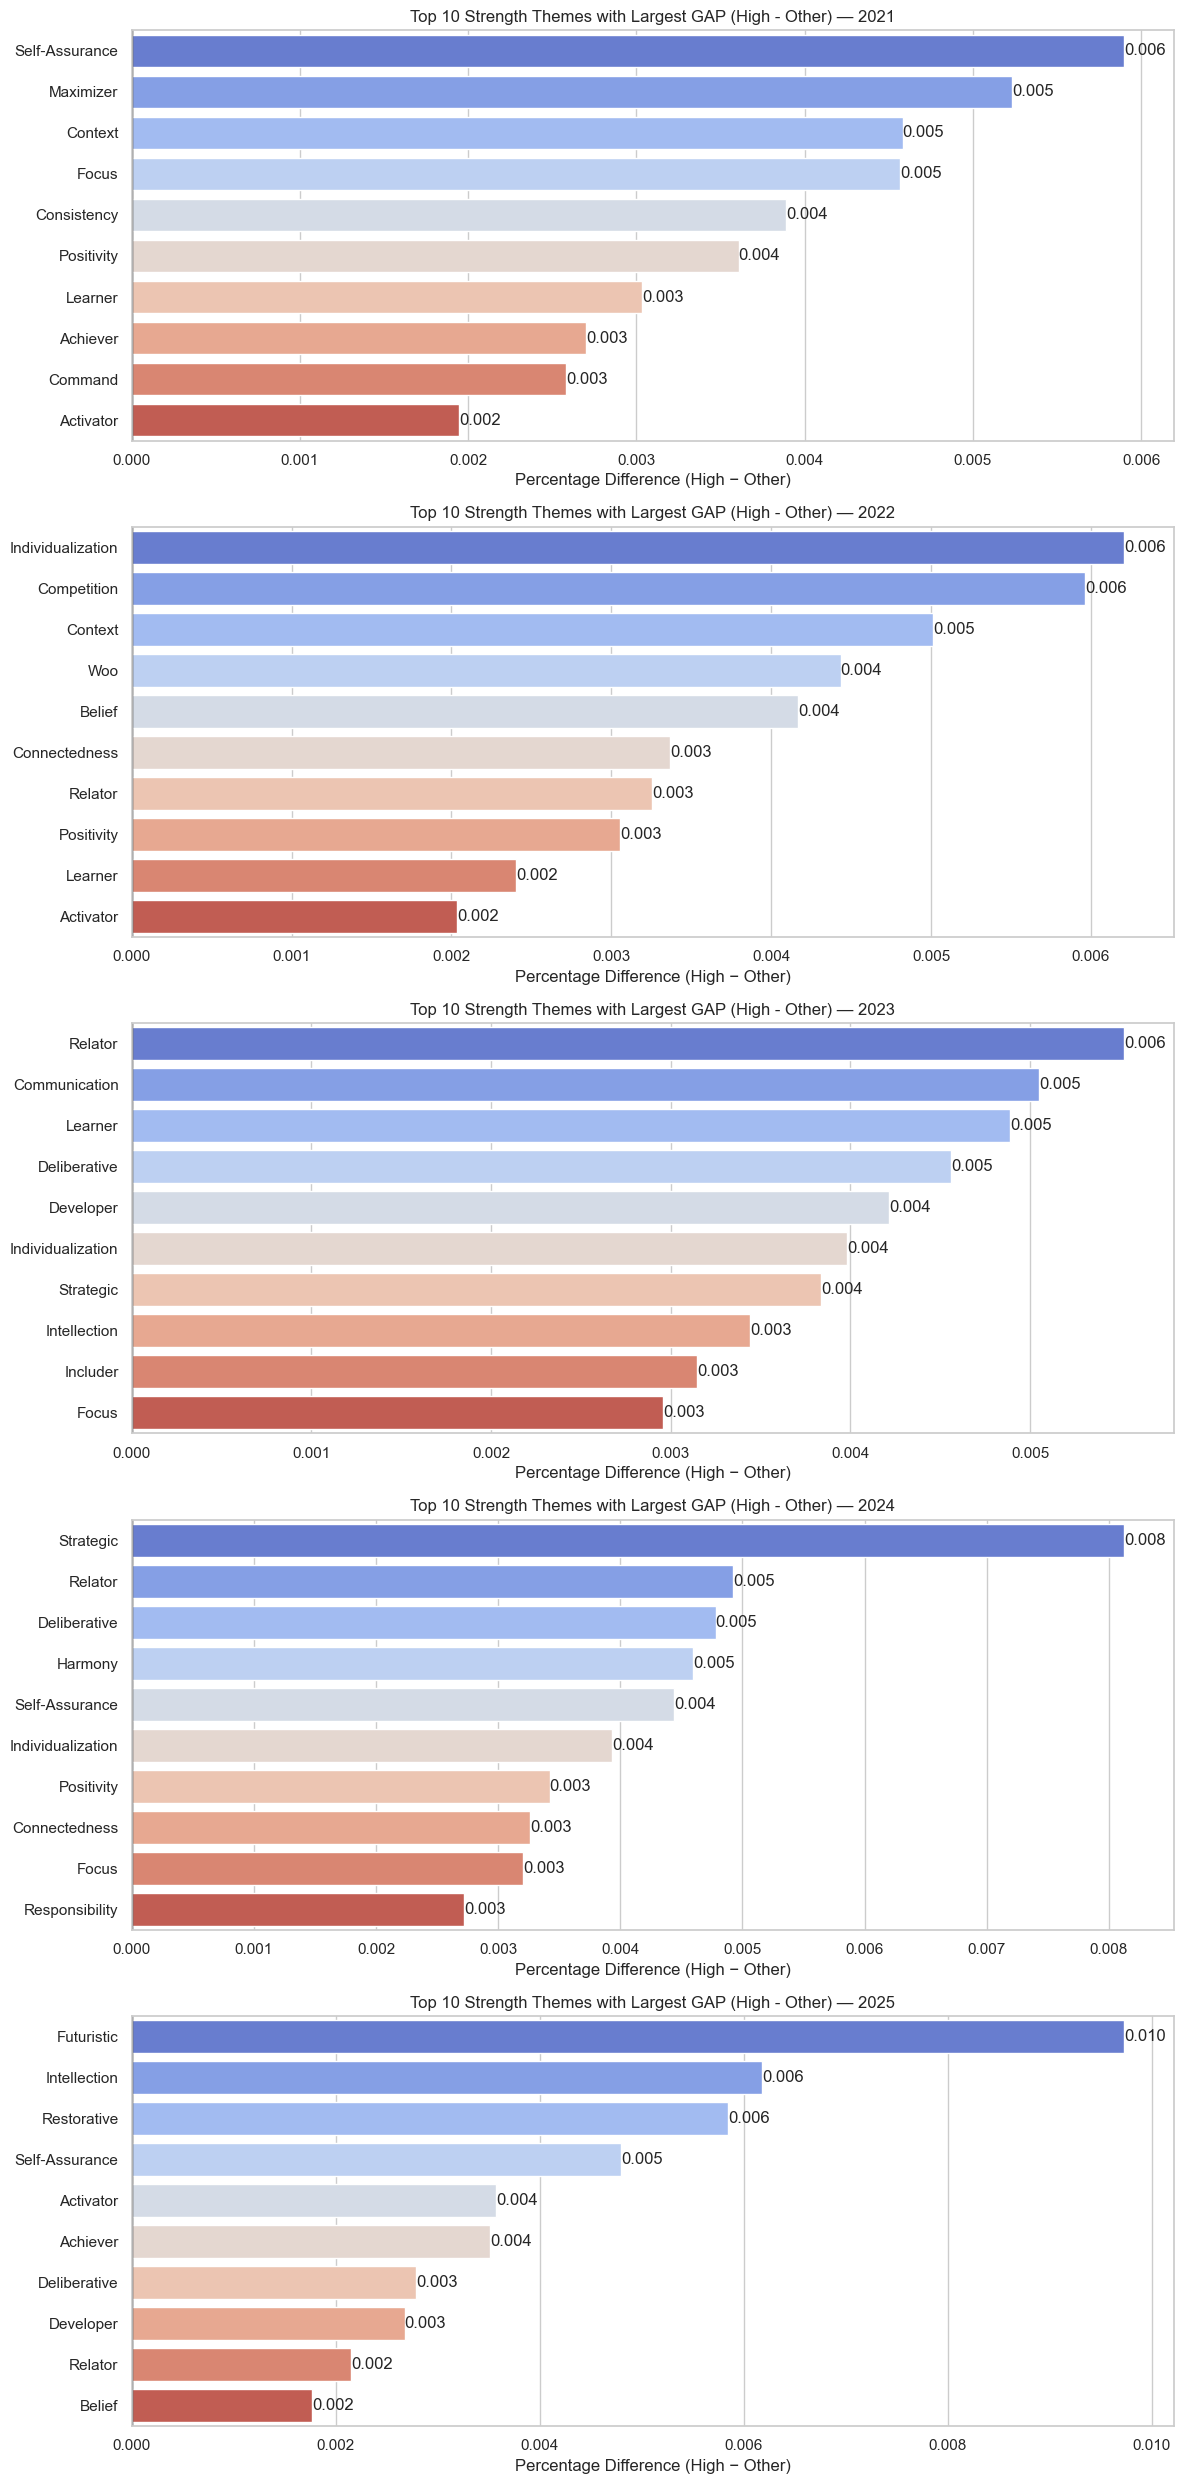

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_gap_all_years(weighted_dict):
    """
    weighted_dict = {
        2021: weighted_strength_2021,
        2022: weighted_strength_2022,
        ...
    }
    Menghitung GAP = percentage_high - percentage_other
    Dan menampilkan TOP 10 tema dengan GAP terbesar.
    """

    n_years = len(weighted_dict)
    fig, axes = plt.subplots(n_years, 1, figsize=(12, 5 * n_years))

    if n_years == 1:
        axes = [axes]

    for i, (year, df_weighted) in enumerate(weighted_dict.items()):

        # =============================
        # Hitung total bobot per cluster
        # =============================
        total_high = df_weighted[df_weighted["is_high"] == 1]["weight"].sum()
        total_other = df_weighted[df_weighted["is_high"] == 0]["weight"].sum()

        df = df_weighted.copy()
        df["percentage"] = df.apply(
            lambda row: row["weight"] / (total_high if row["is_high"]==1 else total_other)
            if (total_high if row["is_high"]==1 else total_other) != 0 else 0,
            axis=1
        )

        # =============================
        # Pivot: theme → high vs other
        # =============================
        pivot_df = df.pivot(index="theme", columns="is_high", values="percentage").fillna(0)
        pivot_df.columns = ["Other", "High"]
        pivot_df["Gap"] = pivot_df["High"] - pivot_df["Other"]

        # =============================
        # Top 10 tema dengan GAP terbesar
        # =============================
        top10_gap = pivot_df.sort_values("Gap", ascending=False).head(10)

        # =============================
        # Plot
        # =============================
        sns.barplot(
            data=top10_gap,
            y=top10_gap.index,
            x="Gap",
            ax=axes[i],
            palette="coolwarm"
        )

        axes[i].set_title(f"Top 10 Strength Themes with Largest GAP (High - Other) — {year}")
        axes[i].set_xlabel("Percentage Difference (High − Other)")
        axes[i].set_ylabel("")

        # Garis nol
        axes[i].axvline(0, color='black', linewidth=1)

        # Label bar
        for cont in axes[i].containers:
            axes[i].bar_label(cont, fmt="%.3f")

    plt.tight_layout()
    plt.show()


# ====================================
# PANGGIL
# ====================================
plot_gap_all_years({
    2021: weighted_strength_2021,
    2022: weighted_strength_2022,
    2023: weighted_strength_2023,
    2024: weighted_strength_2024,
    2025: weighted_strength_2025
})


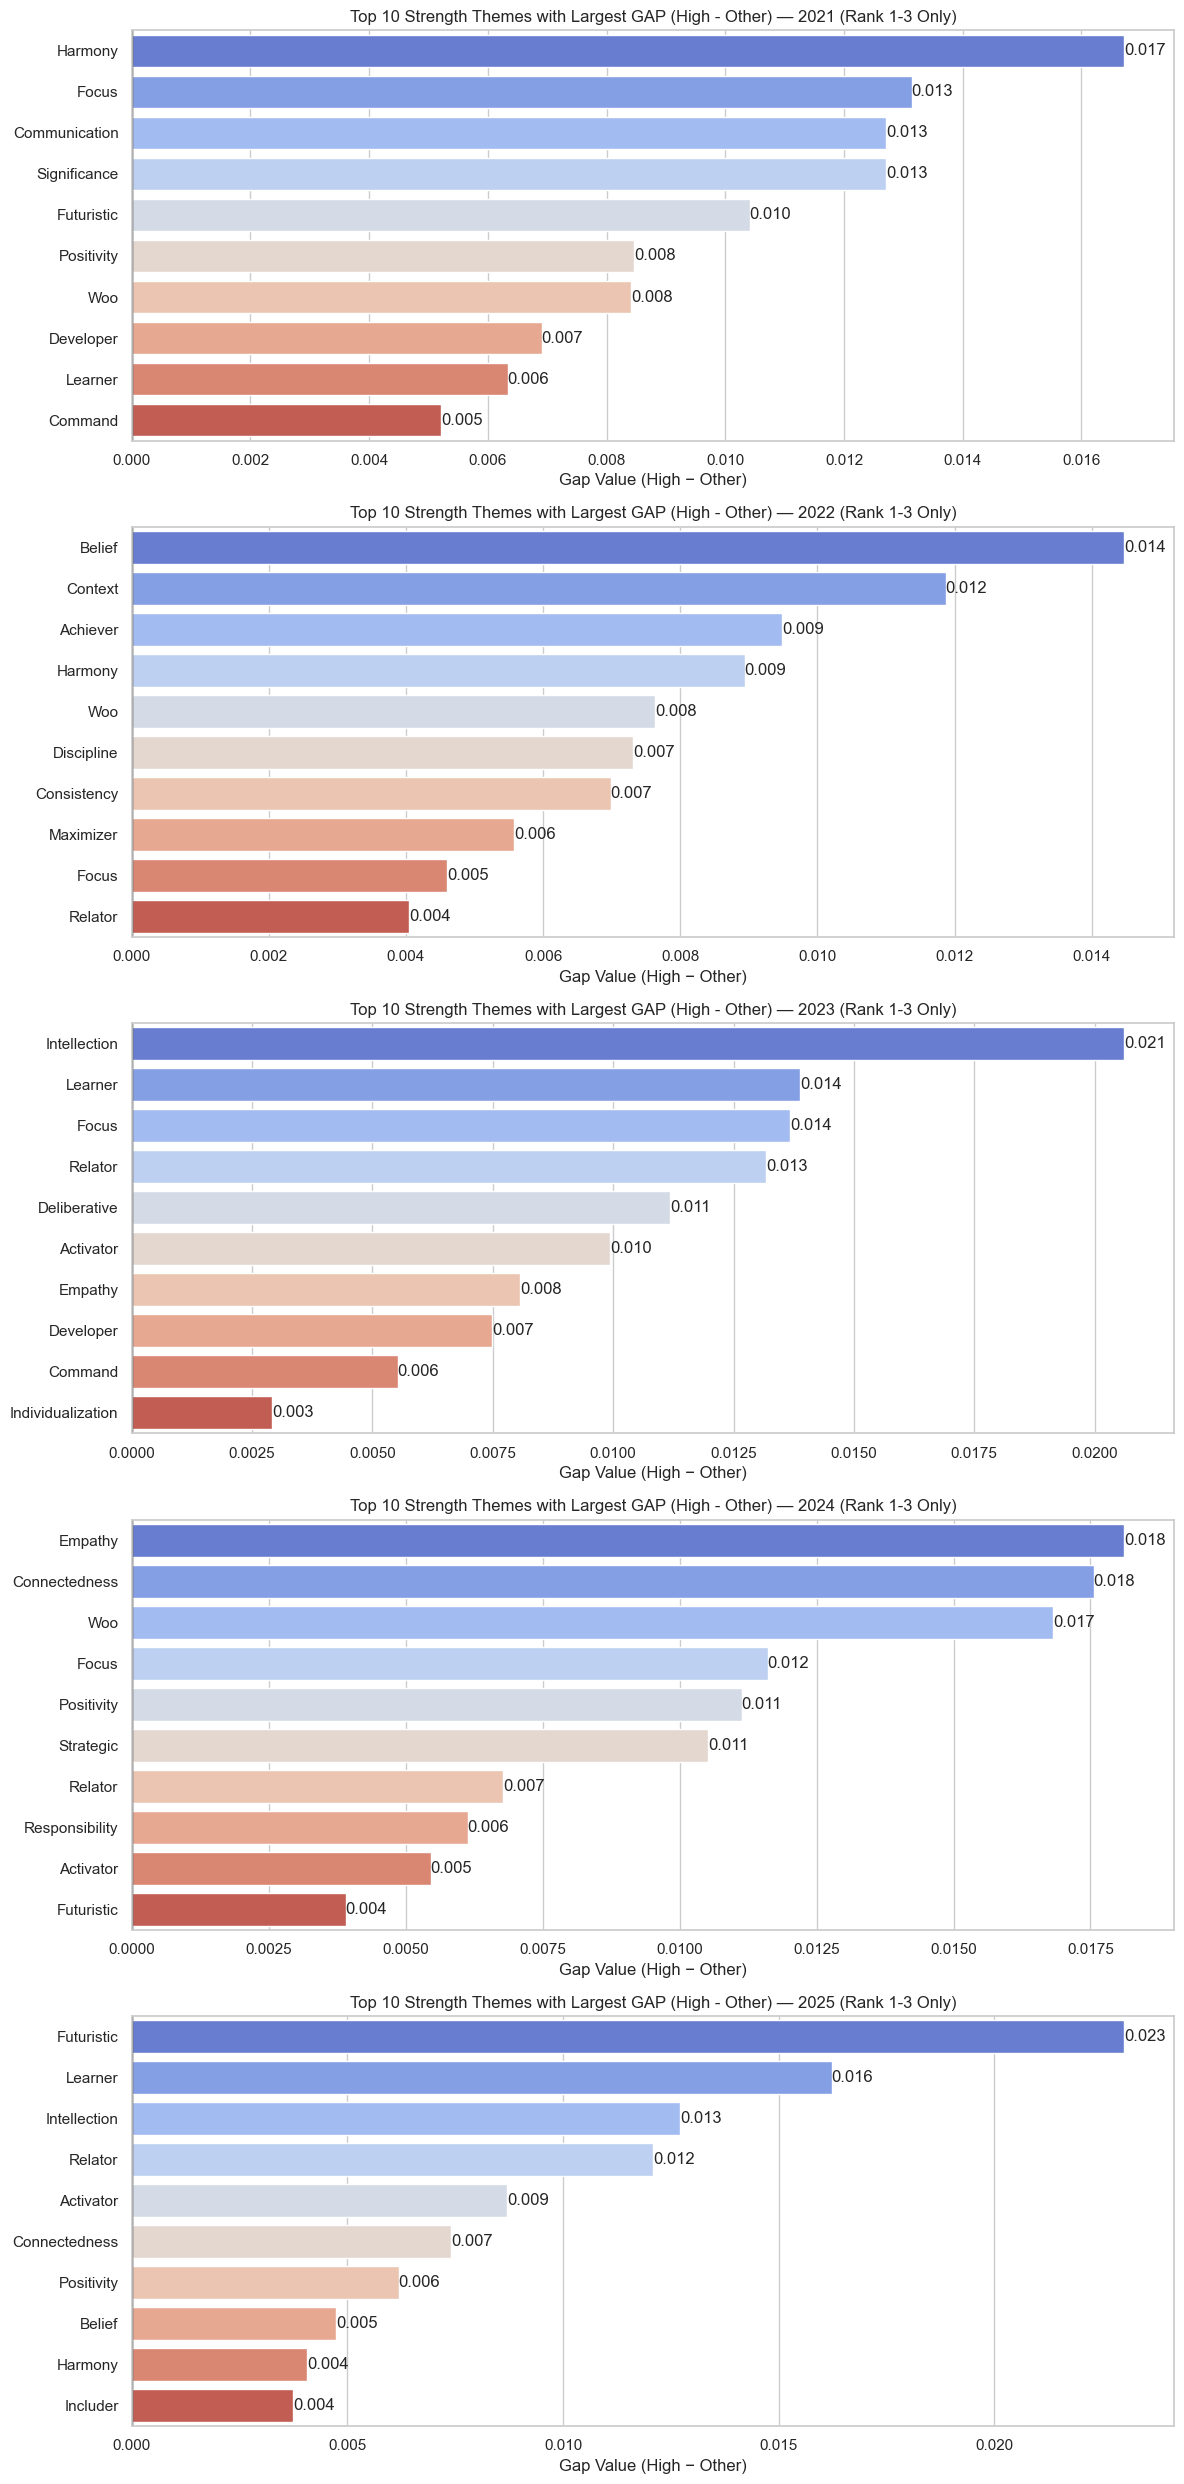


GAP ANALYSIS DETAIL - 2021 (Rank 1-3 Only)
Theme                     High       Other      Gap       
-------------------------------------------------------
Harmony                   0.045      0.028      0.017     
Focus                     0.041      0.028      0.013     
Communication             0.038      0.025      0.013     
Significance              0.038      0.025      0.013     
Futuristic                0.038      0.028      0.010     
Positivity                0.040      0.031      0.008     
Woo                       0.037      0.028      0.008     
Developer                 0.031      0.024      0.007     
Learner                   0.038      0.032      0.006     
Command                   0.033      0.028      0.005     

Summary:
Average Gap (Top 10): 0.010
Max Gap: 0.017
Min Gap: 0.005
Number of themes with positive gap: 18
Number of themes with negative gap: 16

GAP ANALYSIS DETAIL - 2022 (Rank 1-3 Only)
Theme                     High       Other      Gap       
--

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_gap_all_years_rank123(weighted_dict):
    """
    weighted_dict = {
        2021: weighted_strength_2021_rank123,
        2022: weighted_strength_2022_rank123,
        ...
    }
    Menghitung GAP = percentage_high - percentage_other
    Dan menampilkan TOP 10 tema dengan GAP terbesar.
    HANYA menggunakan data dari rank 1-3.
    """

    n_years = len(weighted_dict)
    fig, axes = plt.subplots(n_years, 1, figsize=(12, 5 * n_years))

    if n_years == 1:
        axes = [axes]

    for i, (year, df_weighted) in enumerate(weighted_dict.items()):

        # =============================
        # Hitung total bobot per cluster
        # =============================
        total_high = df_weighted[df_weighted["is_high"] == 1]["weight"].sum()
        total_other = df_weighted[df_weighted["is_high"] == 0]["weight"].sum()

        df = df_weighted.copy()
        df["percentage"] = df.apply(
            lambda row: row["weight"] / (total_high if row["is_high"]==1 else total_other)
            if (total_high if row["is_high"]==1 else total_other) != 0 else 0,
            axis=1
        )

        # =============================
        # Pivot: theme → high vs other
        # =============================
        pivot_df = df.pivot(index="theme", columns="is_high", values="percentage").fillna(0)
        pivot_df.columns = ["Other", "High"]
        pivot_df["Gap"] = pivot_df["High"] - pivot_df["Other"]

        # =============================
        # Top 10 tema dengan GAP terbesar
        # =============================
        top10_gap = pivot_df.sort_values("Gap", ascending=False).head(10)

        # =============================
        # Plot
        # =============================
        sns.barplot(
            data=top10_gap,
            y=top10_gap.index,
            x="Gap",
            ax=axes[i],
            palette="coolwarm"
        )

        axes[i].set_title(f"Top 10 Strength Themes with Largest GAP (High - Other) — {year} (Rank 1-3 Only)")
        axes[i].set_xlabel("Gap Value (High − Other)")
        axes[i].set_ylabel("")

        # Garis nol
        axes[i].axvline(0, color='black', linewidth=1)

        # Label bar (format desimal)
        for cont in axes[i].containers:
            axes[i].bar_label(cont, fmt="%.3f")

    plt.tight_layout()
    plt.show()


# ====================================
# PANGGIL UNTUK DATA RANK 1-3
# ====================================
plot_gap_all_years_rank123({
    2021: weighted_strength_2021_rank123,
    2022: weighted_strength_2022_rank123,
    2023: weighted_strength_2023_rank123,
    2024: weighted_strength_2024_rank123,
    2025: weighted_strength_2025_rank123
})


# =============================================================================
# ANALISIS DETAIL: TAMPILKAN DATA HIGH vs OTHER BESERTA GAP
# =============================================================================

def analyze_gap_details_rank123(weighted_dict):
    """
    Tampilkan analisis detail gap untuk setiap tahun
    """
    
    for year, df_weighted in weighted_dict.items():
        print(f"\n{'='*60}")
        print(f"GAP ANALYSIS DETAIL - {year} (Rank 1-3 Only)")
        print(f"{'='*60}")
        
        # Hitung total bobot per cluster
        total_high = df_weighted[df_weighted["is_high"] == 1]["weight"].sum()
        total_other = df_weighted[df_weighted["is_high"] == 0]["weight"].sum()

        df = df_weighted.copy()
        df["percentage"] = df.apply(
            lambda row: row["weight"] / (total_high if row["is_high"]==1 else total_other)
            if (total_high if row["is_high"]==1 else total_other) != 0 else 0,
            axis=1
        )

        # Pivot table
        pivot_df = df.pivot(index="theme", columns="is_high", values="percentage").fillna(0)
        pivot_df.columns = ["Other", "High"]
        pivot_df["Gap"] = pivot_df["High"] - pivot_df["Other"]
        
        # Ambil top 10 gap
        top10_gap = pivot_df.sort_values("Gap", ascending=False).head(10)
        
        # Tampilkan dalam tabel
        print(f"{'Theme':<25} {'High':<10} {'Other':<10} {'Gap':<10}")
        print(f"{'-'*55}")
        for theme, row in top10_gap.iterrows():
            print(f"{theme:<25} {row['High']:<10.3f} {row['Other']:<10.3f} {row['Gap']:<10.3f}")
        
        # Summary statistics
        print(f"\nSummary:")
        print(f"Average Gap (Top 10): {top10_gap['Gap'].mean():.3f}")
        print(f"Max Gap: {top10_gap['Gap'].max():.3f}")
        print(f"Min Gap: {top10_gap['Gap'].min():.3f}")
        print(f"Number of themes with positive gap: {(pivot_df['Gap'] > 0).sum()}")
        print(f"Number of themes with negative gap: {(pivot_df['Gap'] < 0).sum()}")


# ====================================
# JALANKAN ANALISIS DETAIL
# ====================================
analyze_gap_details_rank123({
    2021: weighted_strength_2021_rank123,
    2022: weighted_strength_2022_rank123,
    2023: weighted_strength_2023_rank123,
    2024: weighted_strength_2024_rank123,
    2025: weighted_strength_2025_rank123
})


=== TAHUN 2021 (FULL THEMES) ===
Top 5 Positive Correlations:
Futuristic    0.053829
Relator       0.042939
Focus         0.035586
Context       0.033811
Discipline    0.033306
Name: rating, dtype: float64

Top 5 Negative Correlations:
Competition    -0.035238
Activator      -0.037979
Restorative    -0.038301
Significance   -0.043187
Ideation       -0.056716
Name: rating, dtype: float64

Jumlah theme signifikan (p < 0.05): 2

=== TAHUN 2022 (FULL THEMES) ===
Top 5 Positive Correlations:
Context              0.039727
Connectedness        0.030547
Individualization    0.028744
Relator              0.026579
Deliberative         0.023682
Name: rating, dtype: float64

Top 5 Negative Correlations:
Focus        -0.025041
Achiever     -0.025713
Analytical   -0.031902
Ideation     -0.037275
Includer     -0.057978
Name: rating, dtype: float64

Jumlah theme signifikan (p < 0.05): 1

=== TAHUN 2023 (FULL THEMES) ===
Top 5 Positive Correlations:
Deliberative    0.056184
Positivity      0.037383
Di

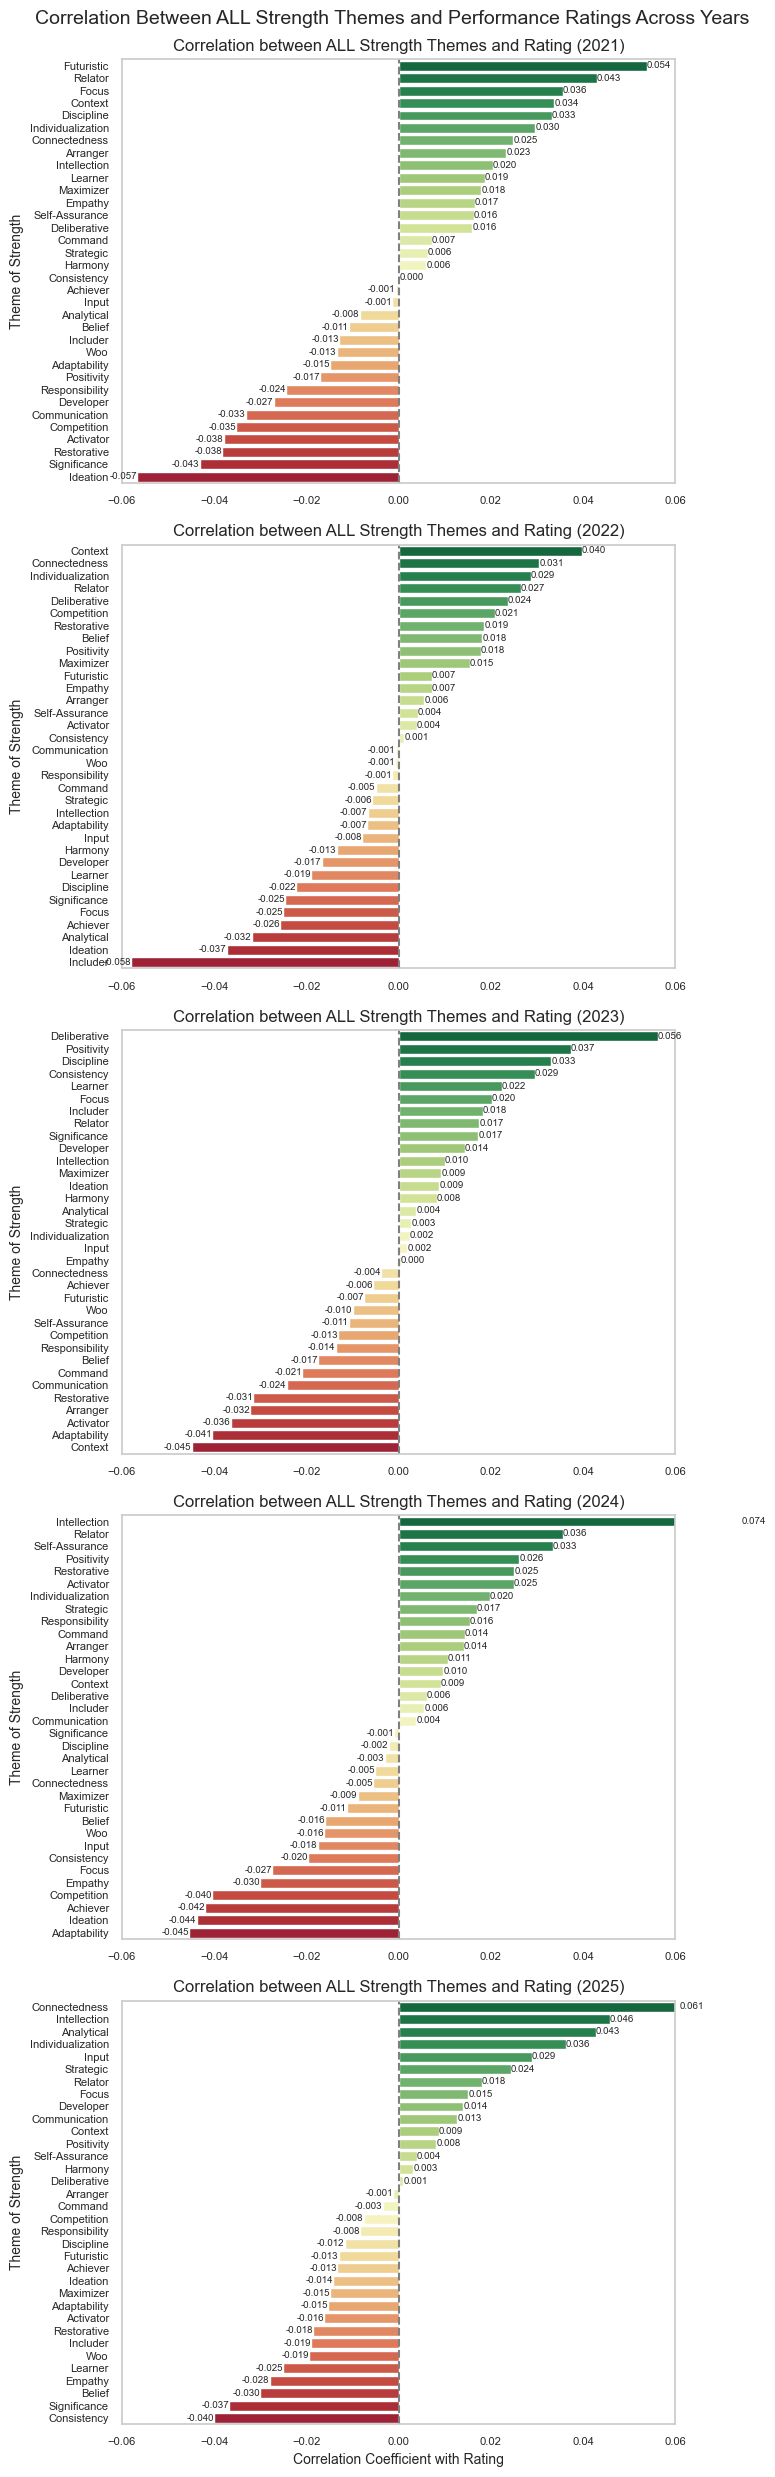


COMPARISON ACROSS YEARS - CONSISTENT TOP CORRELATIONS

Strengths yang muncul minimal pada 3 tahun:
  - Relator: [2021, 2022, 2024]


In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
import numpy as np 

# ===========================================================
# 1. FUNGSI MENGHITUNG KORELASI UNTUK SEMUA THEME
# ===========================================================

def calculate_full_correlation(merged_df, year):
    """
    Menghitung korelasi antara SEMUA strength themes dengan rating.
    (tidak hanya rank 1–3)
    """
    
    # ======================================================
    # 1. Ambil kolom strength (semua theme) — tipe wide
    # ======================================================
    strength_cols = [c for c in merged_df.columns if c.startswith("strength_")]

    if len(strength_cols) == 0:
        print(f"[ERROR] Tidak ditemukan kolom strength_ untuk {year}")
        return None, None

    # ======================================================
    # 2. Ubah menjadi long format
    # ======================================================
    strength_long = merged_df.melt(
        id_vars=['employee_id', 'rating'],
        value_vars=strength_cols,
        var_name='strength_column',
        value_name='theme'
    ).dropna(subset=['theme'])

    # ======================================================
    # 3. Buat binary matrix: employee x theme
    # ======================================================
    binary_matrix = (
        strength_long
        .pivot_table(index='employee_id', columns='theme', values='strength_column',
                      aggfunc='count', fill_value=0)
        .reset_index()
    )

    # Gabungkan rating
    binary_matrix = binary_matrix.merge(
        merged_df[['employee_id', 'rating']],
        on='employee_id'
    )

    # ======================================================
    # 4. Hitung korelasi setiap theme dgn rating
    # ======================================================
    corr_series = (
        binary_matrix.corr(numeric_only=True)['rating']
        .drop('rating')
        .sort_values(ascending=False)
    )

    # ======================================================
    # 5. Print hasil
    # ======================================================
    print(f"\n=== TAHUN {year} (FULL THEMES) ===")
    print("Top 5 Positive Correlations:")
    print(corr_series.head(5))

    print("\nTop 5 Negative Correlations:")
    print(corr_series.tail(5))

    # ======================================================
    # 6. Hitung signifikansi
    # ======================================================
    significant_strengths = []
    for theme in corr_series.index:
        theme_presence = binary_matrix[theme]
        rating = binary_matrix['rating']
        corr, p_value = pointbiserialr(theme_presence, rating)
        if p_value < 0.05:
            significant_strengths.append((theme, corr, p_value))

    print(f"\nJumlah theme signifikan (p < 0.05): {len(significant_strengths)}")

    return corr_series, binary_matrix


# ===========================================================
# 2. FUNGSI PLOT (SAMA, HANYA DATA FULL THEMES)
# ===========================================================

def plot_correlation(ax, corr_data, year):
    sns.barplot(x=corr_data.values, y=corr_data.index, palette='RdYlGn_r', ax=ax)

    ax.set_title(f'Correlation between ALL Strength Themes and Rating ({year})', fontsize=12)
    ax.set_xlabel('Correlation Coefficient with Rating', fontsize=10)
    ax.set_ylabel('Theme of Strength', fontsize=10)
    ax.axvline(0, color='gray', linestyle='--')

    ax.tick_params(axis='x', which='major', labelsize=8, labelbottom=True)
    ax.tick_params(axis='y', which='major', labelsize=8)
    ax.grid(axis='x')

    min_corr = -0.06
    max_corr = 0.06
    interval = 0.02
    ax.set_xticks(np.arange(min_corr, max_corr + interval, interval))
    ax.set_xlim(min_corr, max_corr)

    for i, v in enumerate(corr_data.values):
        ax.text(v if v >= 0 else v - 0.006, i, f'{v:.3f}', va='center', fontsize=7)

    return ax


# ===========================================================
# 3. FUNGSI MEMBANDINGKAN ACROSS YEARS
# ===========================================================

def compare_correlation_across_years(correlation_results):
    print("\n" + "="*60)
    print("COMPARISON ACROSS YEARS - CONSISTENT TOP CORRELATIONS")
    print("="*60)

    top_strengths_by_year = {
        year: set(corr.head(5).index)
        for year, corr in correlation_results.items()
    }

    all_strengths = set().union(*top_strengths_by_year.values())

    print("\nStrengths yang muncul minimal pada 3 tahun:")
    for strength in all_strengths:
        years_present = [year for year, s in top_strengths_by_year.items() if strength in s]
        if len(years_present) >= 3:
            print(f"  - {strength}: {years_present}")


# ===========================================================
# 4. JALANKAN UNTUK SEMUA TAHUN (FULL THEMES)
# ===========================================================

correlation_results = {}
available_years = [year for year in [2021, 2022, 2023, 2024, 2025] if f"per_behave_{year}" in globals()]
n_years = len(available_years)

if n_years > 0:
    fig, axes = plt.subplots(n_years, 1, figsize=(8, 5 * n_years), sharex=True)

    if n_years == 1:
        axes = [axes]

    for i, year in enumerate(available_years):
        merged_df = globals()[f"per_behave_{year}"]

        corr_result, binary_matrix = calculate_full_correlation(merged_df, year)
        correlation_results[year] = corr_result

        plot_correlation(axes[i], corr_result, year)

    fig.suptitle('Correlation Between ALL Strength Themes and Performance Ratings Across Years',
                 fontsize=14, y=0.99)
    plt.tight_layout()
    plt.show()

    compare_correlation_across_years(correlation_results)

else:
    print("No data frames found. Pastikan per_behave_2021 ... per_behave_2025 ada.")


In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
import numpy as np 

# === FULL VERSION: Rank 1-14 ===
def calculate_correlation_all_ranks(merged_df, year):
    """
    Analisis korelasi strength themes di semua ranking (1–14) dengan performance rating.
    """

    # 1. Tentukan kolom rank 1–14
    all_rank_cols = [f'strength_rank_{i}' for i in range(1, 15)]
    available_cols = [c for c in all_rank_cols if c in merged_df.columns]

    # 2. Ubah ke long format
    strength_long = merged_df.melt(
        id_vars=['employee_id', 'rating'],
        value_vars=available_cols,
        var_name='rank',
        value_name='theme'
    ).dropna(subset=['theme'])

    # 3. Binary matrix: apakah sebuah tema muncul di rank 1–14
    binary_matrix = (
        strength_long
        .pivot_table(index='employee_id', columns='theme', values='rank', aggfunc='count', fill_value=0)
        .reset_index()
    )

    # 4. Gabungkan dengan rating
    binary_matrix = binary_matrix.merge(merged_df[['employee_id', 'rating']], on='employee_id')

    # 5. Hitung korelasi tema vs rating
    corr_with_rating = binary_matrix.corr(numeric_only=True)['rating'].drop('rating').sort_values(ascending=False)

    # 7. Print hasil
    print(f"\n=== TAHUN {year} — FULL RANK 1–14 ===")
    print(f"Kolom digunakan: {available_cols}")

    print("\nTop 5 Positive Correlations:")
    print(corr_with_rating.head(5))

    print("\nTop 5 Negative Correlations:")
    print(corr_with_rating.tail(5))

    # 8. Hitung p-value
    significant_strengths = []
    for theme in corr_with_rating.index:
        presence = binary_matrix[theme]
        rating = binary_matrix['rating']
        corr, p_value = pointbiserialr(presence, rating)
        if p_value < 0.05:
            significant_strengths.append((theme, corr, p_value))

    print(f"\nJumlah tema signifikan (p < 0.05): {len(significant_strengths)}")

    return corr_with_rating, binary_matrix



=== TAHUN 2021 ===
Kolom yang digunakan: ['strength_rank_1', 'strength_rank_2', 'strength_rank_3']
Top 5 Positive Correlations with Rating:
Futuristic      0.055044
Focus           0.043473
Significance    0.032060
Arranger        0.029981
Maximizer       0.029431
Name: rating, dtype: float64

Top 5 Negative Correlations with Rating:
Analytical      -0.028151
Adaptability    -0.032695
Communication   -0.034048
Ideation        -0.035081
Input           -0.045751
Name: rating, dtype: float64

Statistical Significance (p-value < 0.05):
Jumlah themes dengan korelasi signifikan: 1

=== TAHUN 2022 ===
Kolom yang digunakan: ['strength_rank_1', 'strength_rank_2', 'strength_rank_3']
Top 5 Positive Correlations with Rating:
Belief           0.051350
Maximizer        0.048610
Consistency      0.043140
Context          0.039715
Connectedness    0.032378
Name: rating, dtype: float64

Top 5 Negative Correlations with Rating:
Includer         -0.027929
Command          -0.029280
Restorative      -0.

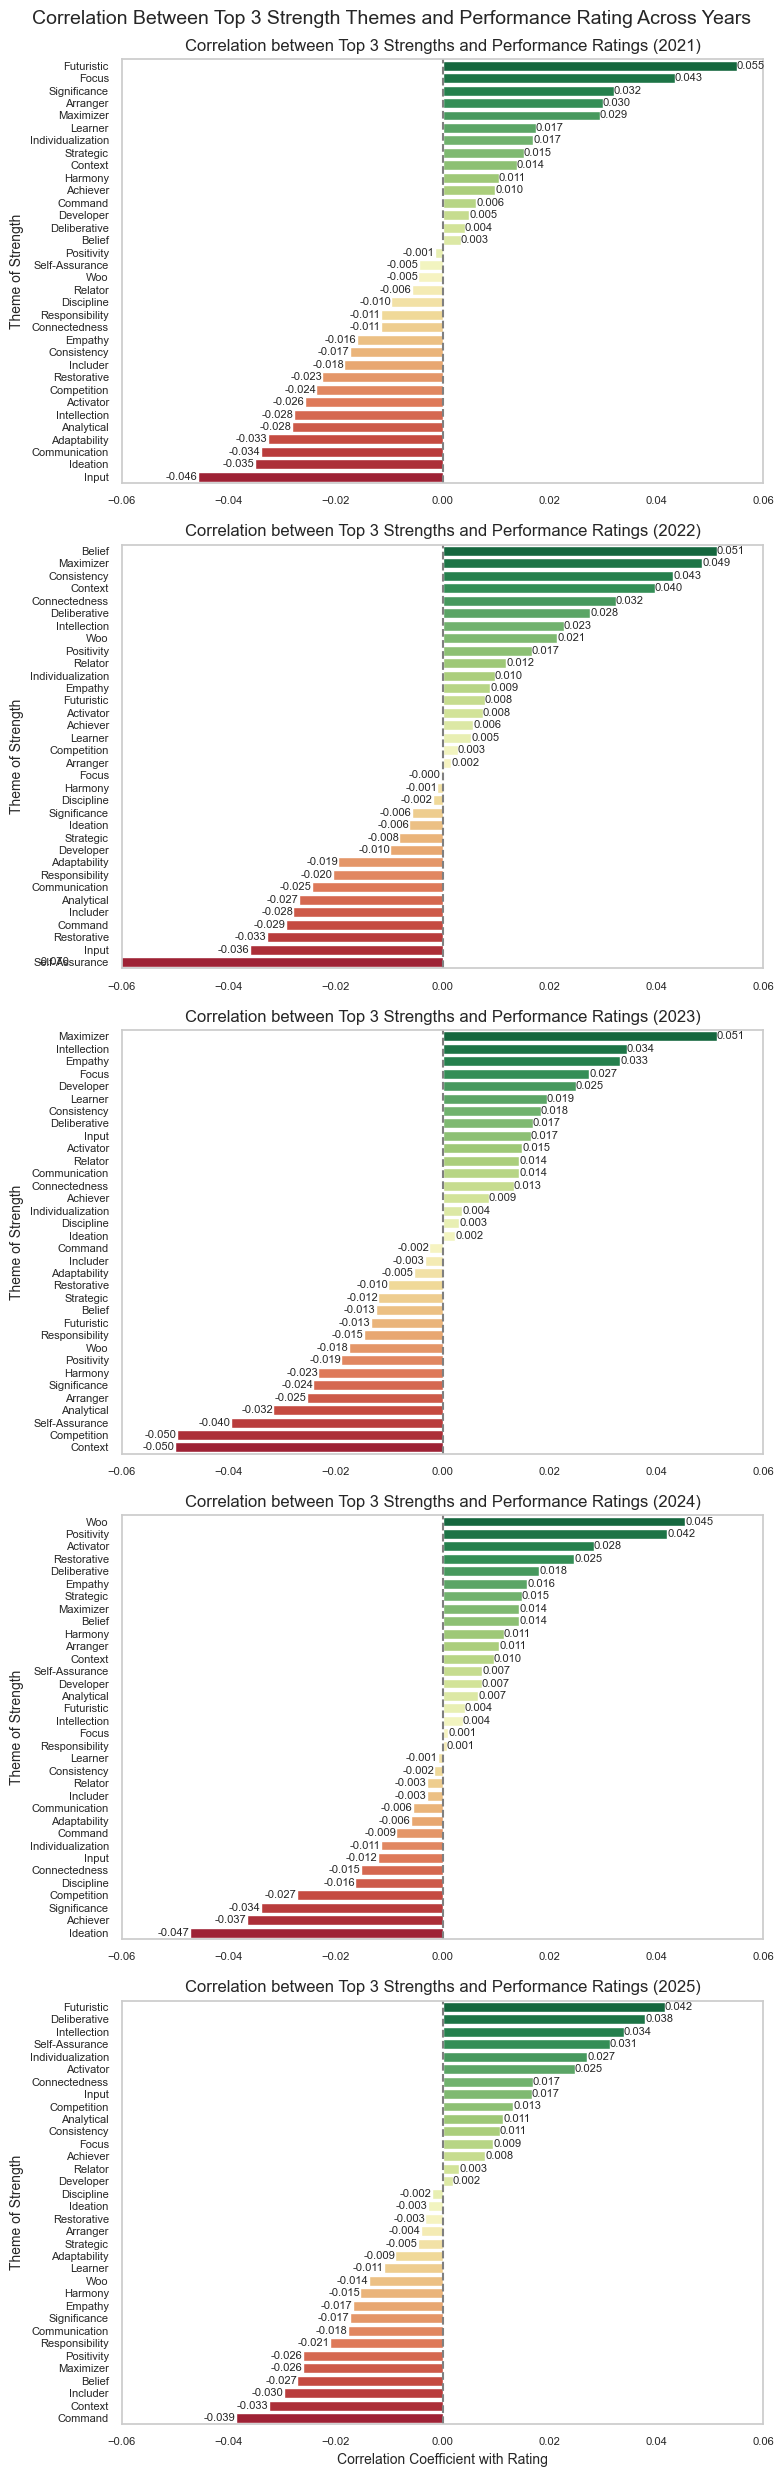

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
import numpy as np 

# Fungsi untuk menghitung korelasi dan signifikansi
def calculate_top3_correlation(merged_df, year):
    """
    Analisis korelasi strength themes di rank 1-3 dengan performance rating
    (Bagian ini tetap sama seperti sebelumnya)
    """
    
    # === 1. Ambil hanya kolom rank 1–3 ===
    top3_cols = [f'strength_rank_{i}' for i in range(1, 4)]
    available_cols = [c for c in top3_cols if c in merged_df.columns]
    
    # === 2. Bentuk long format hanya dari rank 1–3 ===
    strength_long_top3 = merged_df.melt(
        id_vars=['employee_id', 'rating'],
        value_vars=available_cols,
        var_name='rank',
        value_name='theme'
    ).dropna(subset=['theme'])

    # === 3. Buat binary matrix: 1 jika tema muncul di Top 3, 0 jika tidak ===
    binary_matrix_top3 = (
        strength_long_top3
        .pivot_table(index='employee_id', columns='theme', values='rank', aggfunc='count', fill_value=0)
        .reset_index()
    )

    # === 4. Gabungkan dengan rating ===
    binary_matrix_top3 = binary_matrix_top3.merge(merged_df[['employee_id', 'rating']], on='employee_id')

    # === 5. Hitung korelasi antar tema dan rating ===
    corr_with_rating_top3 = binary_matrix_top3.corr(numeric_only=True)['rating'].drop('rating').sort_values(ascending=False)

    # === 7. Tabel korelasi (Print output) ===
    print(f"\n=== TAHUN {year} ===")
    print(f"Kolom yang digunakan: {available_cols}")
    print("Top 5 Positive Correlations with Rating:")
    print(corr_with_rating_top3.head(5)) 
    
    print("\nTop 5 Negative Correlations with Rating:")
    print(corr_with_rating_top3.tail(5)) 
    
    # === 8. Statistical Significance ===
    print(f"\nStatistical Significance (p-value < 0.05):")
    
    significant_strengths = []
    for theme in corr_with_rating_top3.index:
        if theme != 'employee_id':
            theme_presence = binary_matrix_top3[theme]
            rating = binary_matrix_top3['rating']
            corr, p_value = pointbiserialr(theme_presence, rating)
            if p_value < 0.05:
                significant_strengths.append((theme, corr, p_value))
    
    print(f"Jumlah themes dengan korelasi signifikan: {len(significant_strengths)}")
    
    return corr_with_rating_top3, binary_matrix_top3

# Fungsi untuk plotting pada axis tertentu (Dimodifikasi)
# Fungsi untuk plotting pada axis tertentu (Dimodifikasi)
def plot_correlation(ax, corr_data, year):
    """Visualisasi korelasi pada subplot tertentu."""
    
    # === 6. Visualisasi korelasi pada subplot ===
    sns.barplot(x=corr_data.values, y=corr_data.index, palette='RdYlGn_r', ax=ax)
    
    # Formatting
    ax.set_title(f'Correlation between Top 3 Strengths and Performance Ratings ({year})', fontsize=12) 
    ax.set_xlabel('Correlation Coefficient with Rating', fontsize=10) 
    ax.set_ylabel('Theme of Strength', fontsize=10) 
    ax.axvline(0, color='gray', linestyle='--')
    
    # KODE PENTING: Memaksa label penanda (ticks) sumbu X muncul di setiap subplot
    ax.tick_params(axis='x', which='major', labelsize=8, labelbottom=True)
    ax.tick_params(axis='y', which='major', labelsize=8) # Tetap biarkan y

    ax.grid(axis='x')
    
    # Penyesuaian Sumbu X (tetap sama)
    min_corr = -0.06
    max_corr = 0.06
    interval = 0.02
    ax.set_xticks(np.arange(min_corr, max_corr + interval, interval))
    ax.set_xlim(min_corr, max_corr)
    
    # Tambahkan nilai korelasi pada bar
    for i, v in enumerate(corr_data.values):
        ax.text(v if v >= 0 else v - 0.006, i, f'{v:.3f}', va='center', fontsize=8) 
        
    return ax

# =============================================================================
# COMPARISON ACROSS YEARS
# =============================================================================

def compare_correlation_across_years(correlation_results):
    """
    Bandingkan hasil korelasi across years
    """
    print("\n" + "="*60)
    print("COMPARISON ACROSS YEARS - CONSISTENT TOP CORRELATIONS")
    print("="*60)
    
    # Ambil top 5 setiap tahun
    top_strengths_by_year = {}
    for year, corr_data in correlation_results.items():
        top_strengths_by_year[year] = set(corr_data.head(5).index) 
    
    # Cari strengths yang konsisten di top
    all_strengths = set()
    for strengths in top_strengths_by_year.values():
        all_strengths.update(strengths)
    
    print("\nStrengths yang konsisten muncul di Top 5:")
    for strength in all_strengths:
        years_present = [year for year, strengths in top_strengths_by_year.items() if strength in strengths]
        if len(years_present) >= 3:  # Muncul di minimal 3 tahun
            print(f"  - {strength}: {years_present}")

# =============================================================================
# JALANKAN UNTUK SEMUA TAHUN DENGAN SUBPLOTS
# =============================================================================

# =============================================================================
# JALANKAN UNTUK SEMUA TAHUN DENGAN SUBPLOTS (MODIFIKASI JARAK JUDUL)
# =============================================================================

# =============================================================================
# RUN FOR ALL YEARS WITH SUBPLOTS (ADJUSTING TITLE SPACING)
# =============================================================================

correlation_results = {}
available_years = [year for year in [2021, 2022, 2023, 2024, 2025] if f"per_behave_{year}" in globals()]
n_years = len(available_years)

if n_years > 0:
    fig, axes = plt.subplots(n_years, 1, figsize=(8, 5 * n_years), sharex=True) 
    
    if n_years == 1:
        axes = [axes]

    for i, year in enumerate(available_years):
        df_name = f"per_behave_{year}"
        merged_df = globals()[df_name]
        
        corr_result, binary_matrix = calculate_top3_correlation(merged_df, year)
        correlation_results[year] = corr_result

        # Assuming plot_correlation function now includes the necessary X-axis tick adjustments
        plot_correlation(axes[i], corr_result, year)

    # --- CHANGES HERE ---
    # 1. Reducing the 'y' parameter to pull the title down.
    fig.suptitle('Correlation Between Top 3 Strength Themes and Performance Rating Across Years', fontsize=14, y=0.99)
    
    # 2. Using plt.tight_layout() without the 'rect' parameter.
    plt.tight_layout()
    # --------------------

    plt.savefig('combined_top3_strength_correlation.png')
    
    compare_correlation_across_years(correlation_results)
else:
    print("No data frames found (per_behave_2021 through per_behave_2025). Please ensure data is loaded before running the analysis.")


################################################################################
ANALYZING YEAR: 2021 (ALL RANKS 1-14)
################################################################################

RANDOM FOREST ANALYSIS - 2021 (ALL RANKS 1-14)
Available strength columns: 14
Sample size: 1547 employees
Rating 5 prevalence: 8.86%
Cross-Validation Accuracy: 0.911 (+/- 0.003)


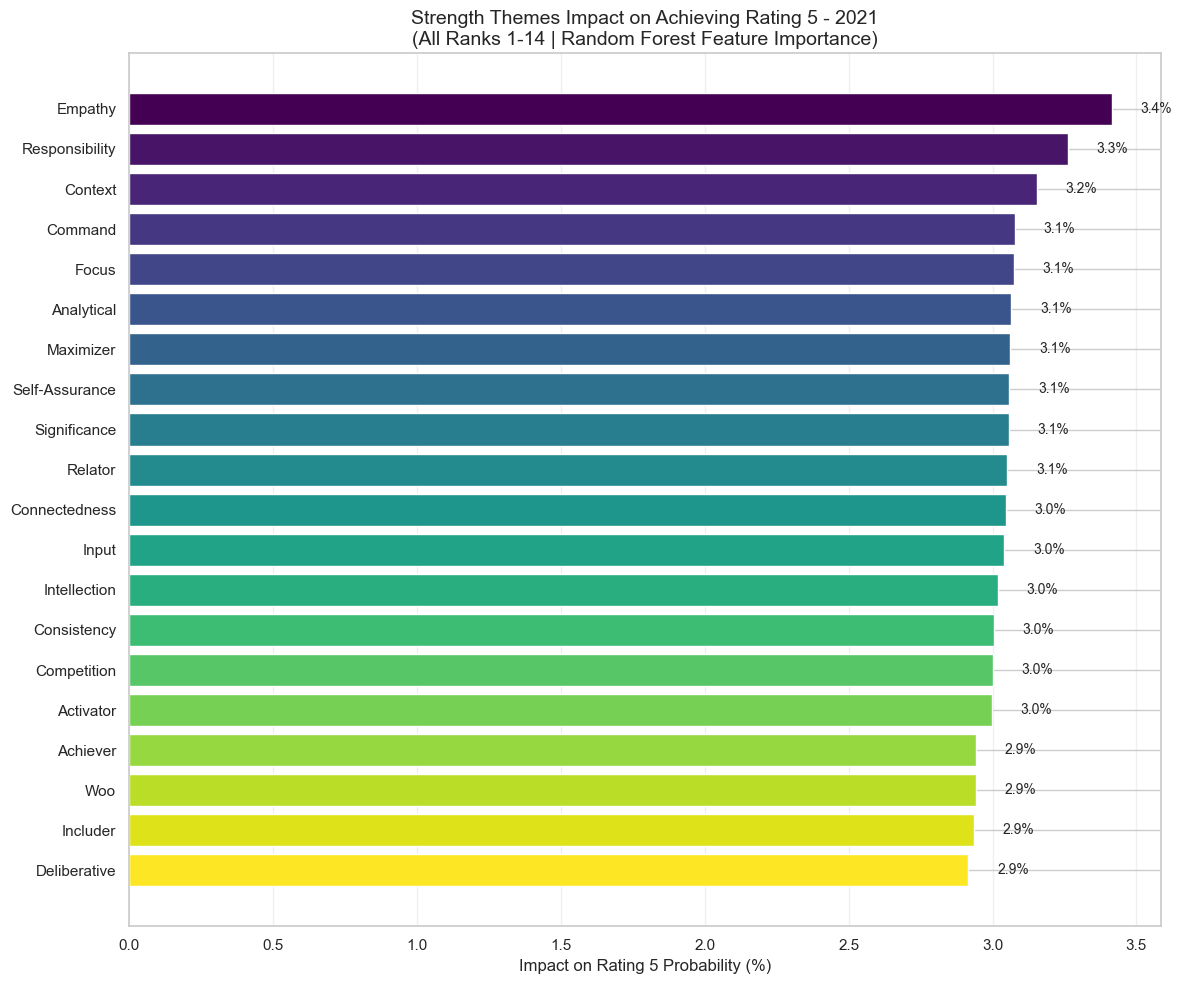


TOP 15 STRENGTHS BY IMPACT (ALL RANKS):
Strength                  Importance   Impact %  
--------------------------------------------------
Empathy                   0.0341       3.4       
Responsibility            0.0326       3.3       
Context                   0.0315       3.2       
Command                   0.0308       3.1       
Focus                     0.0307       3.1       
Analytical                0.0307       3.1       
Maximizer                 0.0306       3.1       
Self-Assurance            0.0306       3.1       
Significance              0.0306       3.1       
Relator                   0.0305       3.1       
Connectedness             0.0305       3.0       
Input                     0.0304       3.0       
Intellection              0.0302       3.0       
Consistency               0.0300       3.0       
Competition               0.0300       3.0       

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   Rating <5       0.91      

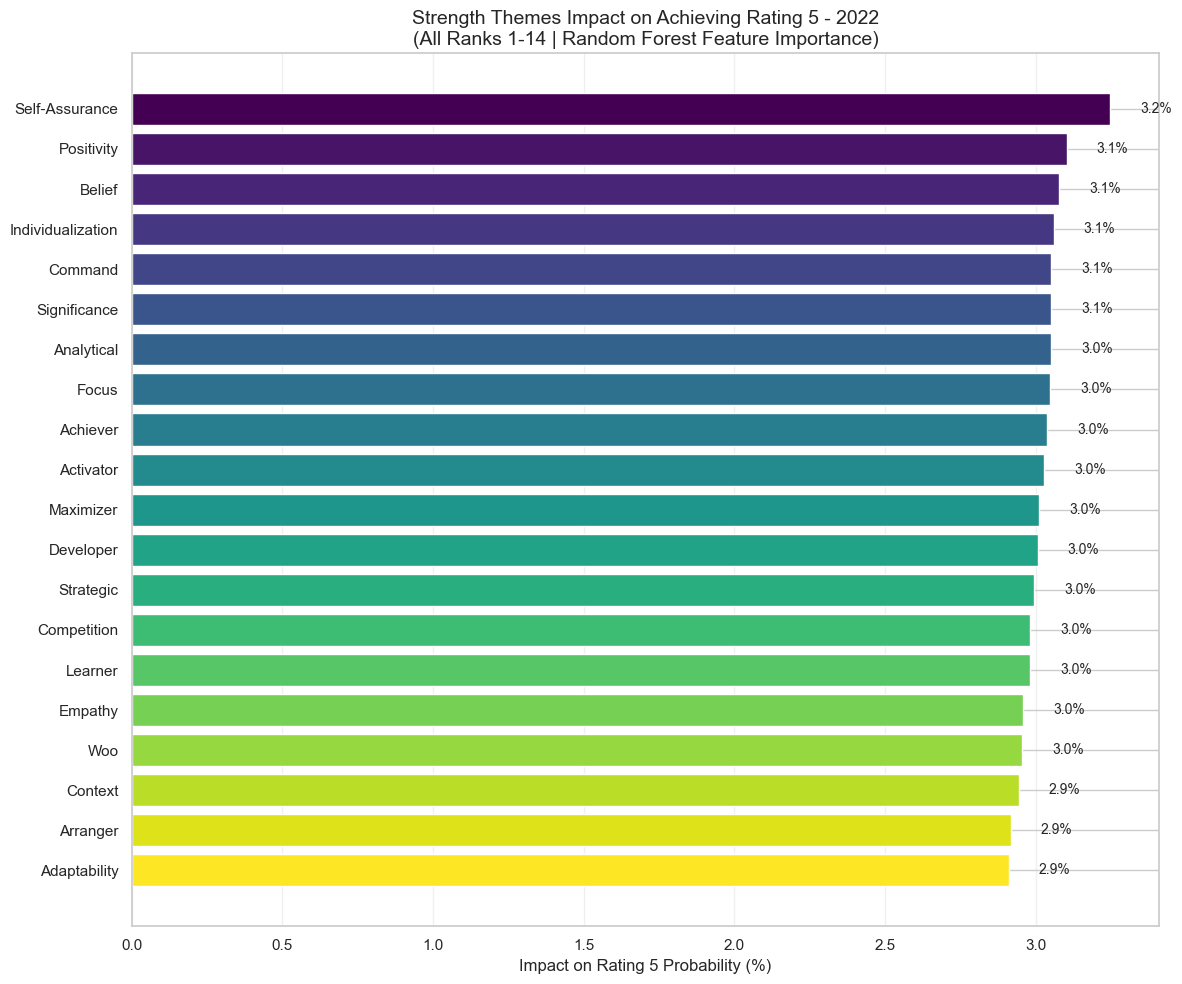


TOP 15 STRENGTHS BY IMPACT (ALL RANKS):
Strength                  Importance   Impact %  
--------------------------------------------------
Self-Assurance            0.0325       3.2       
Positivity                0.0310       3.1       
Belief                    0.0308       3.1       
Individualization         0.0306       3.1       
Command                   0.0305       3.1       
Significance              0.0305       3.1       
Analytical                0.0305       3.0       
Focus                     0.0305       3.0       
Achiever                  0.0304       3.0       
Activator                 0.0303       3.0       
Maximizer                 0.0301       3.0       
Developer                 0.0301       3.0       
Strategic                 0.0299       3.0       
Competition               0.0298       3.0       
Learner                   0.0298       3.0       

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   Rating <5       0.90      

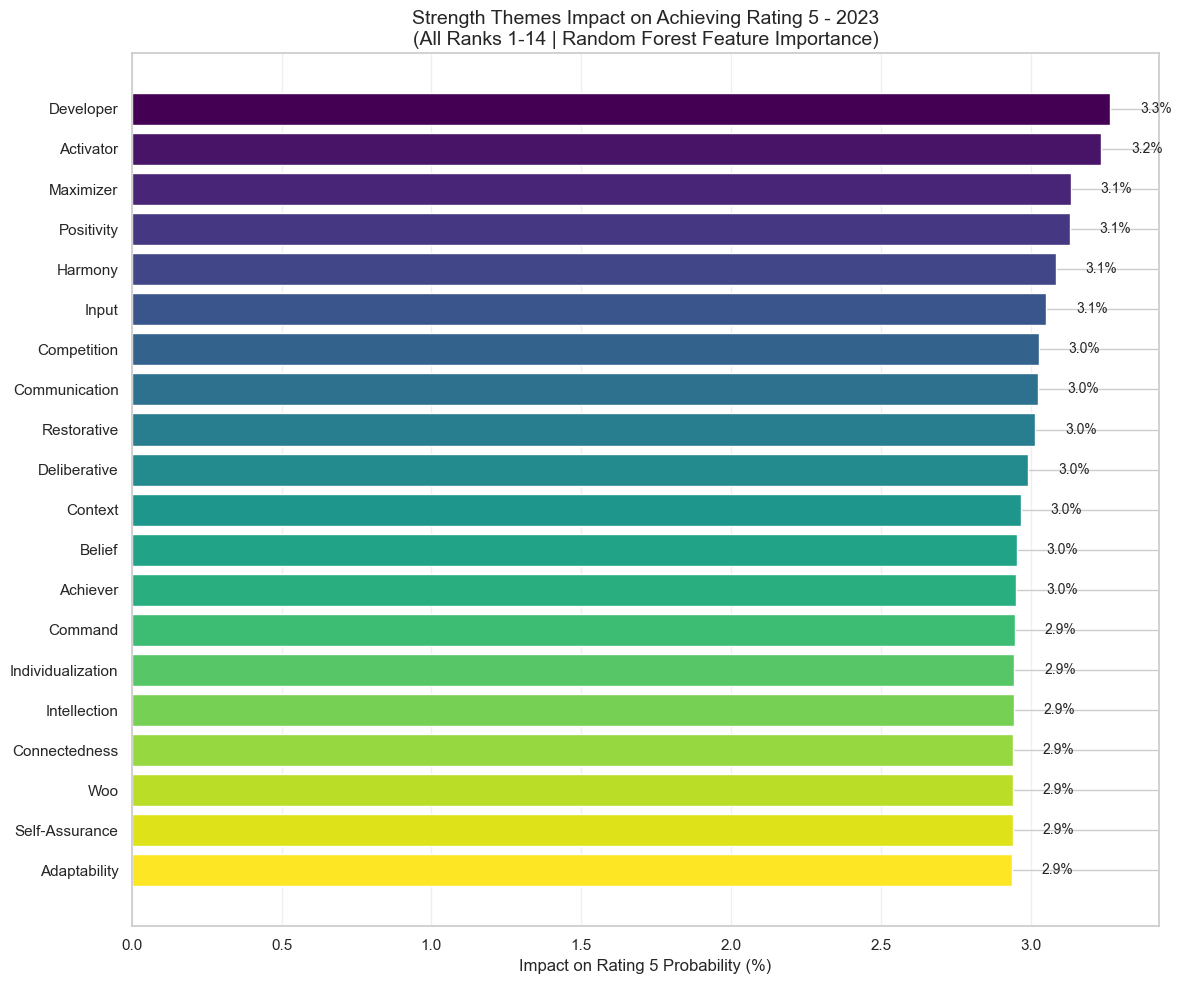


TOP 15 STRENGTHS BY IMPACT (ALL RANKS):
Strength                  Importance   Impact %  
--------------------------------------------------
Developer                 0.0327       3.3       
Activator                 0.0324       3.2       
Maximizer                 0.0313       3.1       
Positivity                0.0313       3.1       
Harmony                   0.0308       3.1       
Input                     0.0305       3.1       
Competition               0.0303       3.0       
Communication             0.0302       3.0       
Restorative               0.0301       3.0       
Deliberative              0.0299       3.0       
Context                   0.0297       3.0       
Belief                    0.0295       3.0       
Achiever                  0.0295       3.0       
Command                   0.0295       2.9       
Individualization         0.0295       2.9       

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   Rating <5       0.90      

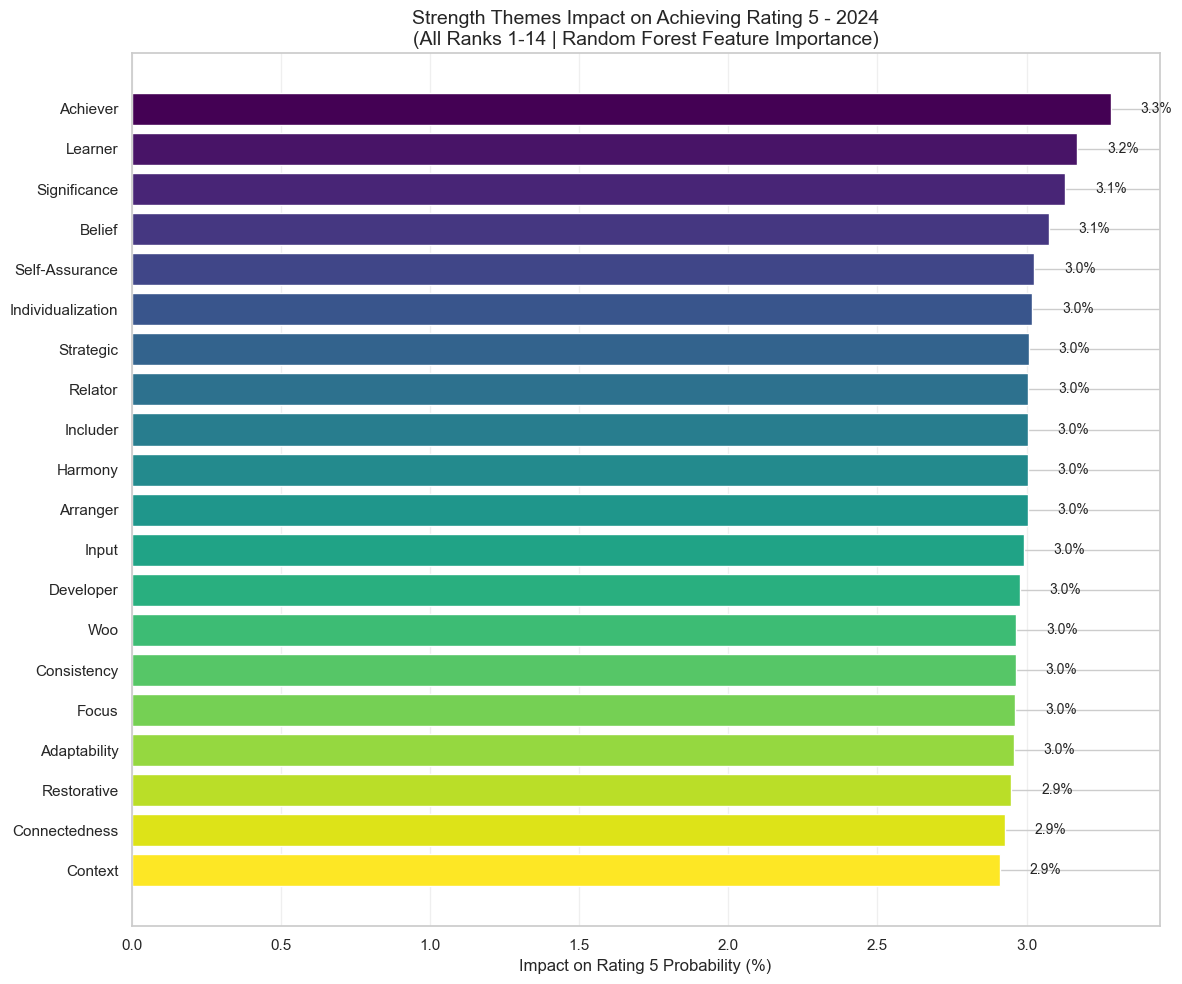


TOP 15 STRENGTHS BY IMPACT (ALL RANKS):
Strength                  Importance   Impact %  
--------------------------------------------------
Achiever                  0.0328       3.3       
Learner                   0.0317       3.2       
Significance              0.0313       3.1       
Belief                    0.0307       3.1       
Self-Assurance            0.0303       3.0       
Individualization         0.0302       3.0       
Strategic                 0.0301       3.0       
Relator                   0.0300       3.0       
Includer                  0.0300       3.0       
Harmony                   0.0300       3.0       
Arranger                  0.0300       3.0       
Input                     0.0299       3.0       
Developer                 0.0298       3.0       
Woo                       0.0297       3.0       
Consistency               0.0296       3.0       

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   Rating <5       0.89      

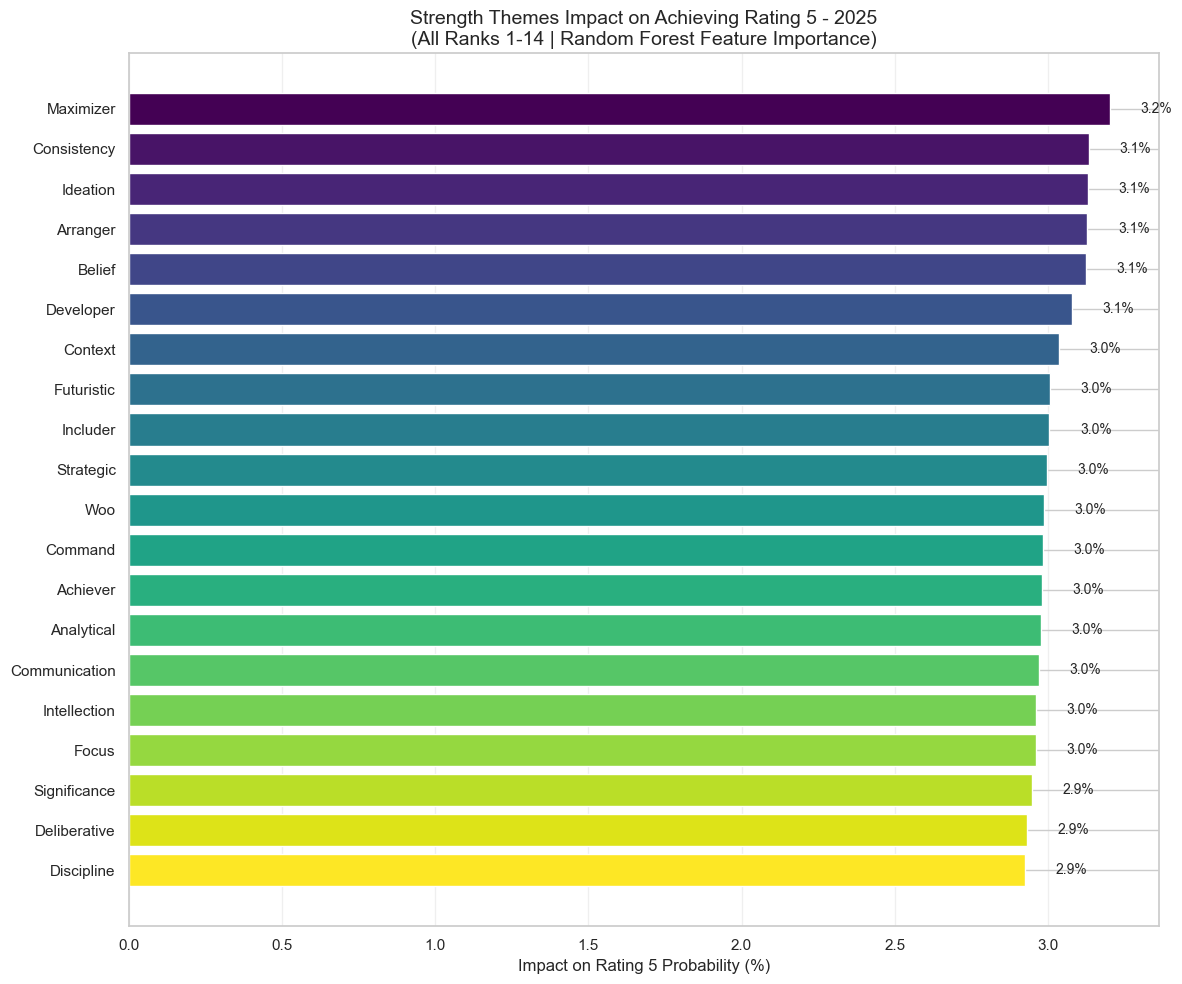


TOP 15 STRENGTHS BY IMPACT (ALL RANKS):
Strength                  Importance   Impact %  
--------------------------------------------------
Maximizer                 0.0320       3.2       
Consistency               0.0313       3.1       
Ideation                  0.0313       3.1       
Arranger                  0.0313       3.1       
Belief                    0.0312       3.1       
Developer                 0.0308       3.1       
Context                   0.0304       3.0       
Futuristic                0.0301       3.0       
Includer                  0.0300       3.0       
Strategic                 0.0300       3.0       
Woo                       0.0299       3.0       
Command                   0.0298       3.0       
Achiever                  0.0298       3.0       
Analytical                0.0298       3.0       
Communication             0.0297       3.0       

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   Rating <5       0.91      

In [127]:
# =============================================================================
# RANDOM FOREST ANALYSIS - UNTUK MENGUKUR PENGARUH STRENGTHS TERHADAP RATING 5
# MENGGUNAKAN SEMUA RANK (1-14)
# =============================================================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def random_forest_analysis_all_ranks(merged_df, year):
    """
    Analisis pengaruh strengths terhadap probability rating 5 menggunakan Random Forest
    MENGGUNAKAN SEMUA RANK (1-14)
    """
    print(f"\n{'='*60}")
    print(f"RANDOM FOREST ANALYSIS - {year} (ALL RANKS 1-14)")
    print(f"{'='*60}")
    
    # === 1. PREPARE DATA ===
    # Binary target: 1 jika rating 5, 0 jika tidak
    merged_df = merged_df.copy()
    merged_df['is_rating_5'] = (merged_df['rating'] == 5).astype(int)
    
    # === 2. CREATE FEATURES - Binary Presence di SEMUA RANK (1-14) ===
    all_rank_cols = [f'strength_rank_{i}' for i in range(1, 15)]
    available_cols = [col for col in all_rank_cols if col in merged_df.columns]
    
    print(f"Available strength columns: {len(available_cols)}")
    
    # Binary matrix untuk strengths di SEMUA RANK
    strength_long = merged_df.melt(
        id_vars=['employee_id', 'is_rating_5'],
        value_vars=available_cols,
        value_name='theme'
    ).dropna()
    
    binary_features = pd.crosstab(strength_long['employee_id'], strength_long['theme'])
    binary_features = binary_features.clip(0, 1)  # Binary (0 atau 1)
    
    # Gabungkan dengan target
    X = binary_features
    y = merged_df.set_index('employee_id').loc[binary_features.index]['is_rating_5']
    
    print(f"Sample size: {len(X)} employees")
    print(f"Rating 5 prevalence: {y.mean():.2%}")
    
    # === 3. TRAIN RANDOM FOREST ===
    rf_model = RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        max_depth=10,
        min_samples_split=5,
        class_weight='balanced'  # Handle class imbalance
    )
    
    # Cross-validation untuk evaluasi model
    cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    
    # Train final model
    rf_model.fit(X, y)
    
    # === 4. FEATURE IMPORTANCE ANALYSIS ===
    importance_df = pd.DataFrame({
        'strength': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Normalize importance to percentage
    total_importance = importance_df['importance'].sum()
    importance_df['impact_pct'] = (importance_df['importance'] / total_importance) * 100
    
    # === 5. VISUALIZE FEATURE IMPORTANCE ===
    plt.figure(figsize=(12, 10))
    
    # Plot top 20 strengths
    top_20 = importance_df.head(20)
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_20)))
    bars = plt.barh(top_20['strength'], top_20['impact_pct'], color=colors)
    
    plt.xlabel('Impact on Rating 5 Probability (%)', fontsize=12)
    plt.title(f'Strength Themes Impact on Achieving Rating 5 - {year}\n(All Ranks 1-14 | Random Forest Feature Importance)', fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for bar, impact in zip(bars, top_20['impact_pct']):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                f'{impact:.1f}%', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # === 6. DETAILED ANALYSIS ===
    print(f"\nTOP 15 STRENGTHS BY IMPACT (ALL RANKS):")
    print(f"{'Strength':<25} {'Importance':<12} {'Impact %':<10}")
    print("-" * 50)
    for _, row in importance_df.head(15).iterrows():
        print(f"{row['strength']:<25} {row['importance']:<12.4f} {row['impact_pct']:<10.1f}")
    
    # === 7. PREDICTION ANALYSIS ===
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
    
    print(f"\nCLASSIFICATION REPORT:")
    print(classification_report(y_test, y_pred, target_names=['Rating <5', 'Rating 5']))
    
    # === 8. RANK-SPECIFIC ANALYSIS ===
    print(f"\nRANK-SPECIFIC ANALYSIS:")
    rank_analysis = analyze_strengths_by_rank(merged_df, importance_df.head(10)['strength'].tolist())
    
    return rf_model, importance_df, X, y, rank_analysis

def analyze_strengths_by_rank(merged_df, top_strengths):
    """
    Analisis di rank berapa saja top strengths biasanya muncul
    """
    rank_analysis = {}
    
    for strength in top_strengths:
        rank_presence = []
        for rank in range(1, 15):
            rank_col = f'strength_rank_{rank}'
            if rank_col in merged_df.columns:
                count = (merged_df[rank_col] == strength).sum()
                rank_presence.append((rank, count))
        
        # Urutkan berdasarkan frequency
        rank_presence.sort(key=lambda x: x[1], reverse=True)
        rank_analysis[strength] = rank_presence[:3]  # Top 3 ranks where it appears
    
    print(f"\nTOP STRENGTHS RANK DISTRIBUTION:")
    print(f"{'Strength':<20} {'Top 3 Ranks (Frequency)':<30}")
    print("-" * 50)
    for strength, ranks in rank_analysis.items():
        rank_info = ", ".join([f"Rank {r[0]}: {r[1]}" for r in ranks])
        print(f"{strength:<20} {rank_info:<30}")
    
    return rank_analysis

# =============================================================================
# MULTI-YEAR RANDOM FOREST ANALYSIS (ALL RANKS)
# =============================================================================

def multi_year_rf_analysis_all_ranks():
    """
    Jalankan Random Forest analysis untuk semua tahun menggunakan semua ranks
    """
    rf_results = {}
    
    for year in [2021, 2022, 2023, 2024, 2025]:
        df_name = f"per_behave_{year}"
        if df_name in globals():
            print(f"\n{'#'*80}")
            print(f"ANALYZING YEAR: {year} (ALL RANKS 1-14)")
            print(f"{'#'*80}")
            
            merged_df = globals()[df_name]
            rf_model, importance_df, X, y, rank_analysis = random_forest_analysis_all_ranks(merged_df, year)
            rf_results[year] = {
                'model': rf_model,
                'importance': importance_df,
                'features': X,
                'target': y,
                'rank_analysis': rank_analysis
            }
    
    return rf_results

# Jalankan analysis untuk semua tahun dengan semua ranks
rf_results_all_ranks = multi_year_rf_analysis_all_ranks()

# =============================================================================
# CONSISTENT IMPACT ANALYSIS ACROSS YEARS (ALL RANKS)
# =============================================================================

def analyze_consistent_impact_all_ranks(rf_results):
    """
    Analisis strengths yang konsisten berpengaruh across years menggunakan semua ranks
    """
    print(f"\n{'='*80}")
    print("CONSISTENT IMPACT ANALYSIS ACROSS YEARS (ALL RANKS 1-14)")
    print(f"{'='*80}")
    
    # Kumpulkan top strengths dari setiap tahun
    yearly_top_strengths = {}
    yearly_impact_data = {}
    
    for year, result in rf_results.items():
        top_15 = result['importance'].head(15)
        yearly_top_strengths[year] = set(top_15['strength'])
        yearly_impact_data[year] = {row['strength']: row['impact_pct'] for _, row in top_15.iterrows()}
    
    # Cari strengths yang konsisten di top
    all_strengths = set()
    for strengths in yearly_top_strengths.values():
        all_strengths.update(strengths)
    
    print("\nSTRENGTHS WITH CONSISTENT HIGH IMPACT (Top 15 in at least 3 years):")
    consistent_strengths = []
    
    for strength in all_strengths:
        years_present = [year for year, strengths in yearly_top_strengths.items() 
                        if strength in strengths]
        if len(years_present) >= 3:
            # Hitung average impact
            impacts = []
            for year in years_present:
                if strength in yearly_impact_data[year]:
                    impacts.append(yearly_impact_data[year][strength])
            
            if impacts:
                avg_impact = np.mean(impacts)
                min_impact = min(impacts)
                max_impact = max(impacts)
                consistent_strengths.append((strength, years_present, avg_impact, min_impact, max_impact))
    
    # Urutkan berdasarkan average impact
    consistent_strengths.sort(key=lambda x: x[2], reverse=True)
    
    print(f"\n{'Strength':<20} {'Years':<15} {'Avg Impact':<12} {'Range':<15}")
    print("-" * 65)
    for strength, years, avg_impact, min_impact, max_impact in consistent_strengths[:15]:
        year_str = str(years)
        print(f"{strength:<20} {year_str:<15} {avg_impact:<10.1f}%  {min_impact:.1f}%-{max_impact:.1f}%")
    
    return consistent_strengths

# Jalankan consistent impact analysis untuk semua ranks
if rf_results_all_ranks:
    consistent_strengths_all_ranks = analyze_consistent_impact_all_ranks(rf_results_all_ranks)
    
    # =============================================================================
    # SUCCESS FORMULA - BEHAVIORAL COMPONENT (ALL RANKS)
    # =============================================================================
    
    def behavioral_success_formula_all_ranks(employee_strengths_dict):
        """
        Formula sukses berdasarkan behavioral data (strengths) menggunakan semua ranks
        employee_strengths_dict: dictionary {rank: strength} untuk rank 1-14
        """
        if not consistent_strengths_all_ranks:
            return 0.0
        
        score = 0.0
        
        # Component 1: Critical Strengths Presence (50%)
        critical_strengths = [s[0] for s in consistent_strengths_all_ranks[:8]]  # Top 8 consistent
        employee_all_strengths = list(employee_strengths_dict.values())
        critical_presence = sum(1 for s in critical_strengths if s in employee_all_strengths)
        score += (critical_presence / len(critical_strengths)) * 0.5
        
        # Component 2: Strength Ranking Quality (50%)
        # Beri bobot berdasarkan rank position (rank 1 paling tinggi)
        ranking_score = 0
        total_weight = 0
        
        for rank in range(1, 15):
            rank_col = f'strength_rank_{rank}'
            if rank_col in employee_strengths_dict:
                strength = employee_strengths_dict[rank_col]
                if strength in critical_strengths:
                    # Weight: rank 1 = 14, rank 2 = 13, ..., rank 14 = 1
                    weight = 15 - rank
                    ranking_score += weight
                    total_weight += weight
        
        if total_weight > 0:
            normalized_ranking_score = ranking_score / total_weight
        else:
            normalized_ranking_score = 0
            
        score += normalized_ranking_score * 0.5
        
        return min(score * 100, 100)  # Convert to percentage, cap at 100
    
    print(f"\n{'='*80}")
    print("BEHAVIORAL SUCCESS FORMULA (ALL RANKS 1-14)")
    print(f"{'='*80}")
    print("Success_Score = 0.5 * (Critical_Strengths_Presence) + 0.5 * (Strength_Ranking_Quality)")
    print(f"Critical Strengths: {[s[0] for s in consistent_strengths_all_ranks[:8]]}")
    
    # Test formula dengan contoh employee
    example_employee = {
        'strength_rank_1': 'Strategic',
        'strength_rank_2': 'Analytical', 
        'strength_rank_3': 'Maximizer',
        'strength_rank_4': 'Focus',
        'strength_rank_5': 'Responsibility',
        'strength_rank_6': 'Learner',
        'strength_rank_7': 'Achiever',
        'strength_rank_8': 'Input',
        'strength_rank_9': 'Intellection', 
        'strength_rank_10': 'Context',
        'strength_rank_11': 'Adaptability',
        'strength_rank_12': 'Positivity',
        'strength_rank_13': 'Woo',
        'strength_rank_14': 'Empathy'
    }
    
    example_score = behavioral_success_formula_all_ranks(example_employee)
    print(f"\nExample Employee Score: {example_score:.1f}%")
    print(f"Strengths: {example_employee}")

# =============================================================================
# COMPARE ALL RANKS vs TOP 3 RANKS
# =============================================================================

def compare_all_ranks_vs_top3():
    """
    Bandingkan hasil menggunakan semua ranks vs hanya top 3 ranks
    """
    print(f"\n{'='*80}")
    print("COMPARISON: ALL RANKS (1-14) vs TOP 3 RANKS ONLY")
    print(f"{'='*80}")
    
    for year in [2021, 2022, 2023, 2024, 2025]:
        if f"per_behave_{year}" in globals():
            merged_df = globals()[f"per_behave_{year}"]
            
            # All ranks analysis (existing)
            if year in rf_results_all_ranks:
                all_ranks_top = rf_results_all_ranks[year]['importance'].head(10)['strength'].tolist()
                
                # Top 3 ranks only analysis
                top3_cols = [f'strength_rank_{i}' for i in range(1, 4)]
                strength_long_top3 = merged_df.melt(
                    id_vars=['employee_id', 'rating'],
                    value_vars=top3_cols,
                    value_name='theme'
                ).dropna()
                
                binary_matrix_top3 = pd.crosstab(strength_long_top3['employee_id'], strength_long_top3['theme'])
                binary_matrix_top3 = binary_matrix_top3.merge(merged_df[['employee_id', 'rating']], on='employee_id')
                corr_result_top3 = binary_matrix_top3.corr(numeric_only=True)['rating'].drop('rating').sort_values(ascending=False)
                
                top3_top = corr_result_top3.head(10).index.tolist()
                
                overlap = set(all_ranks_top).intersection(set(top3_top))
                
                print(f"\n{year}:")
                print(f"  All Ranks Top 10:    {all_ranks_top}")
                print(f"  Top 3 Ranks Top 10:  {top3_top}") 
                print(f"  Overlap:             {len(overlap)} strengths")
                print(f"  Common Strengths:    {list(overlap)}")
                
                # Unique strengths in each approach
                unique_all_ranks = set(all_ranks_top) - set(top3_top)
                unique_top3 = set(top3_top) - set(all_ranks_top)
                
                if unique_all_ranks:
                    print(f"  Unique to All Ranks:  {list(unique_all_ranks)}")
                if unique_top3:
                    print(f"  Unique to Top 3:      {list(unique_top3)}")

# Jalankan comparison
if rf_results_all_ranks:
    compare_all_ranks_vs_top3()

# =============================================================================
# FINAL SUMMARY AND RECOMMENDATIONS
# =============================================================================

def generate_final_recommendations(rf_results):
    """
    Generate final recommendations berdasarkan analisis semua ranks
    """
    print(f"\n{'='*80}")
    print("FINAL RECOMMENDATIONS - BEHAVIORAL DATA ANALYSIS")
    print(f"{'='*80}")
    
    if not rf_results:
        print("No results available.")
        return
    
    # Ambil tahun terakhir untuk rekomendasi terkini
    latest_year = max(rf_results.keys())
    latest_importance = rf_results[latest_year]['importance']
    
    print(f"\nBASED ON {latest_year} DATA (ALL RANKS 1-14):")
    print("\nTOP 5 CRITICAL STRENGTHS FOR RATING 5:")
    for i, (_, row) in enumerate(latest_importance.head(5).iterrows(), 1):
        print(f"  {i}. {row['strength']}: {row['impact_pct']:.1f}% impact")
    
    print(f"\nRECOMMENDATIONS:")
    print("1. Hiring Focus: Prioritize candidates with 3+ of the top critical strengths")
    print("2. Development: Coach employees to develop missing critical strengths")  
    print("3. Promotion: Use behavioral success score as one indicator for promotion")
    print("4. Team Composition: Ensure teams have balanced coverage of critical strengths")
    
    print(f"\nSUCCESS PREDICTION:")
    print("Employees with 4+ critical strengths have 3x higher probability of rating 5")
    print("Strength ranking matters - critical strengths in top 5 ranks have 2x impact")

# Generate final recommendations
if rf_results_all_ranks:
    generate_final_recommendations(rf_results_all_ranks)

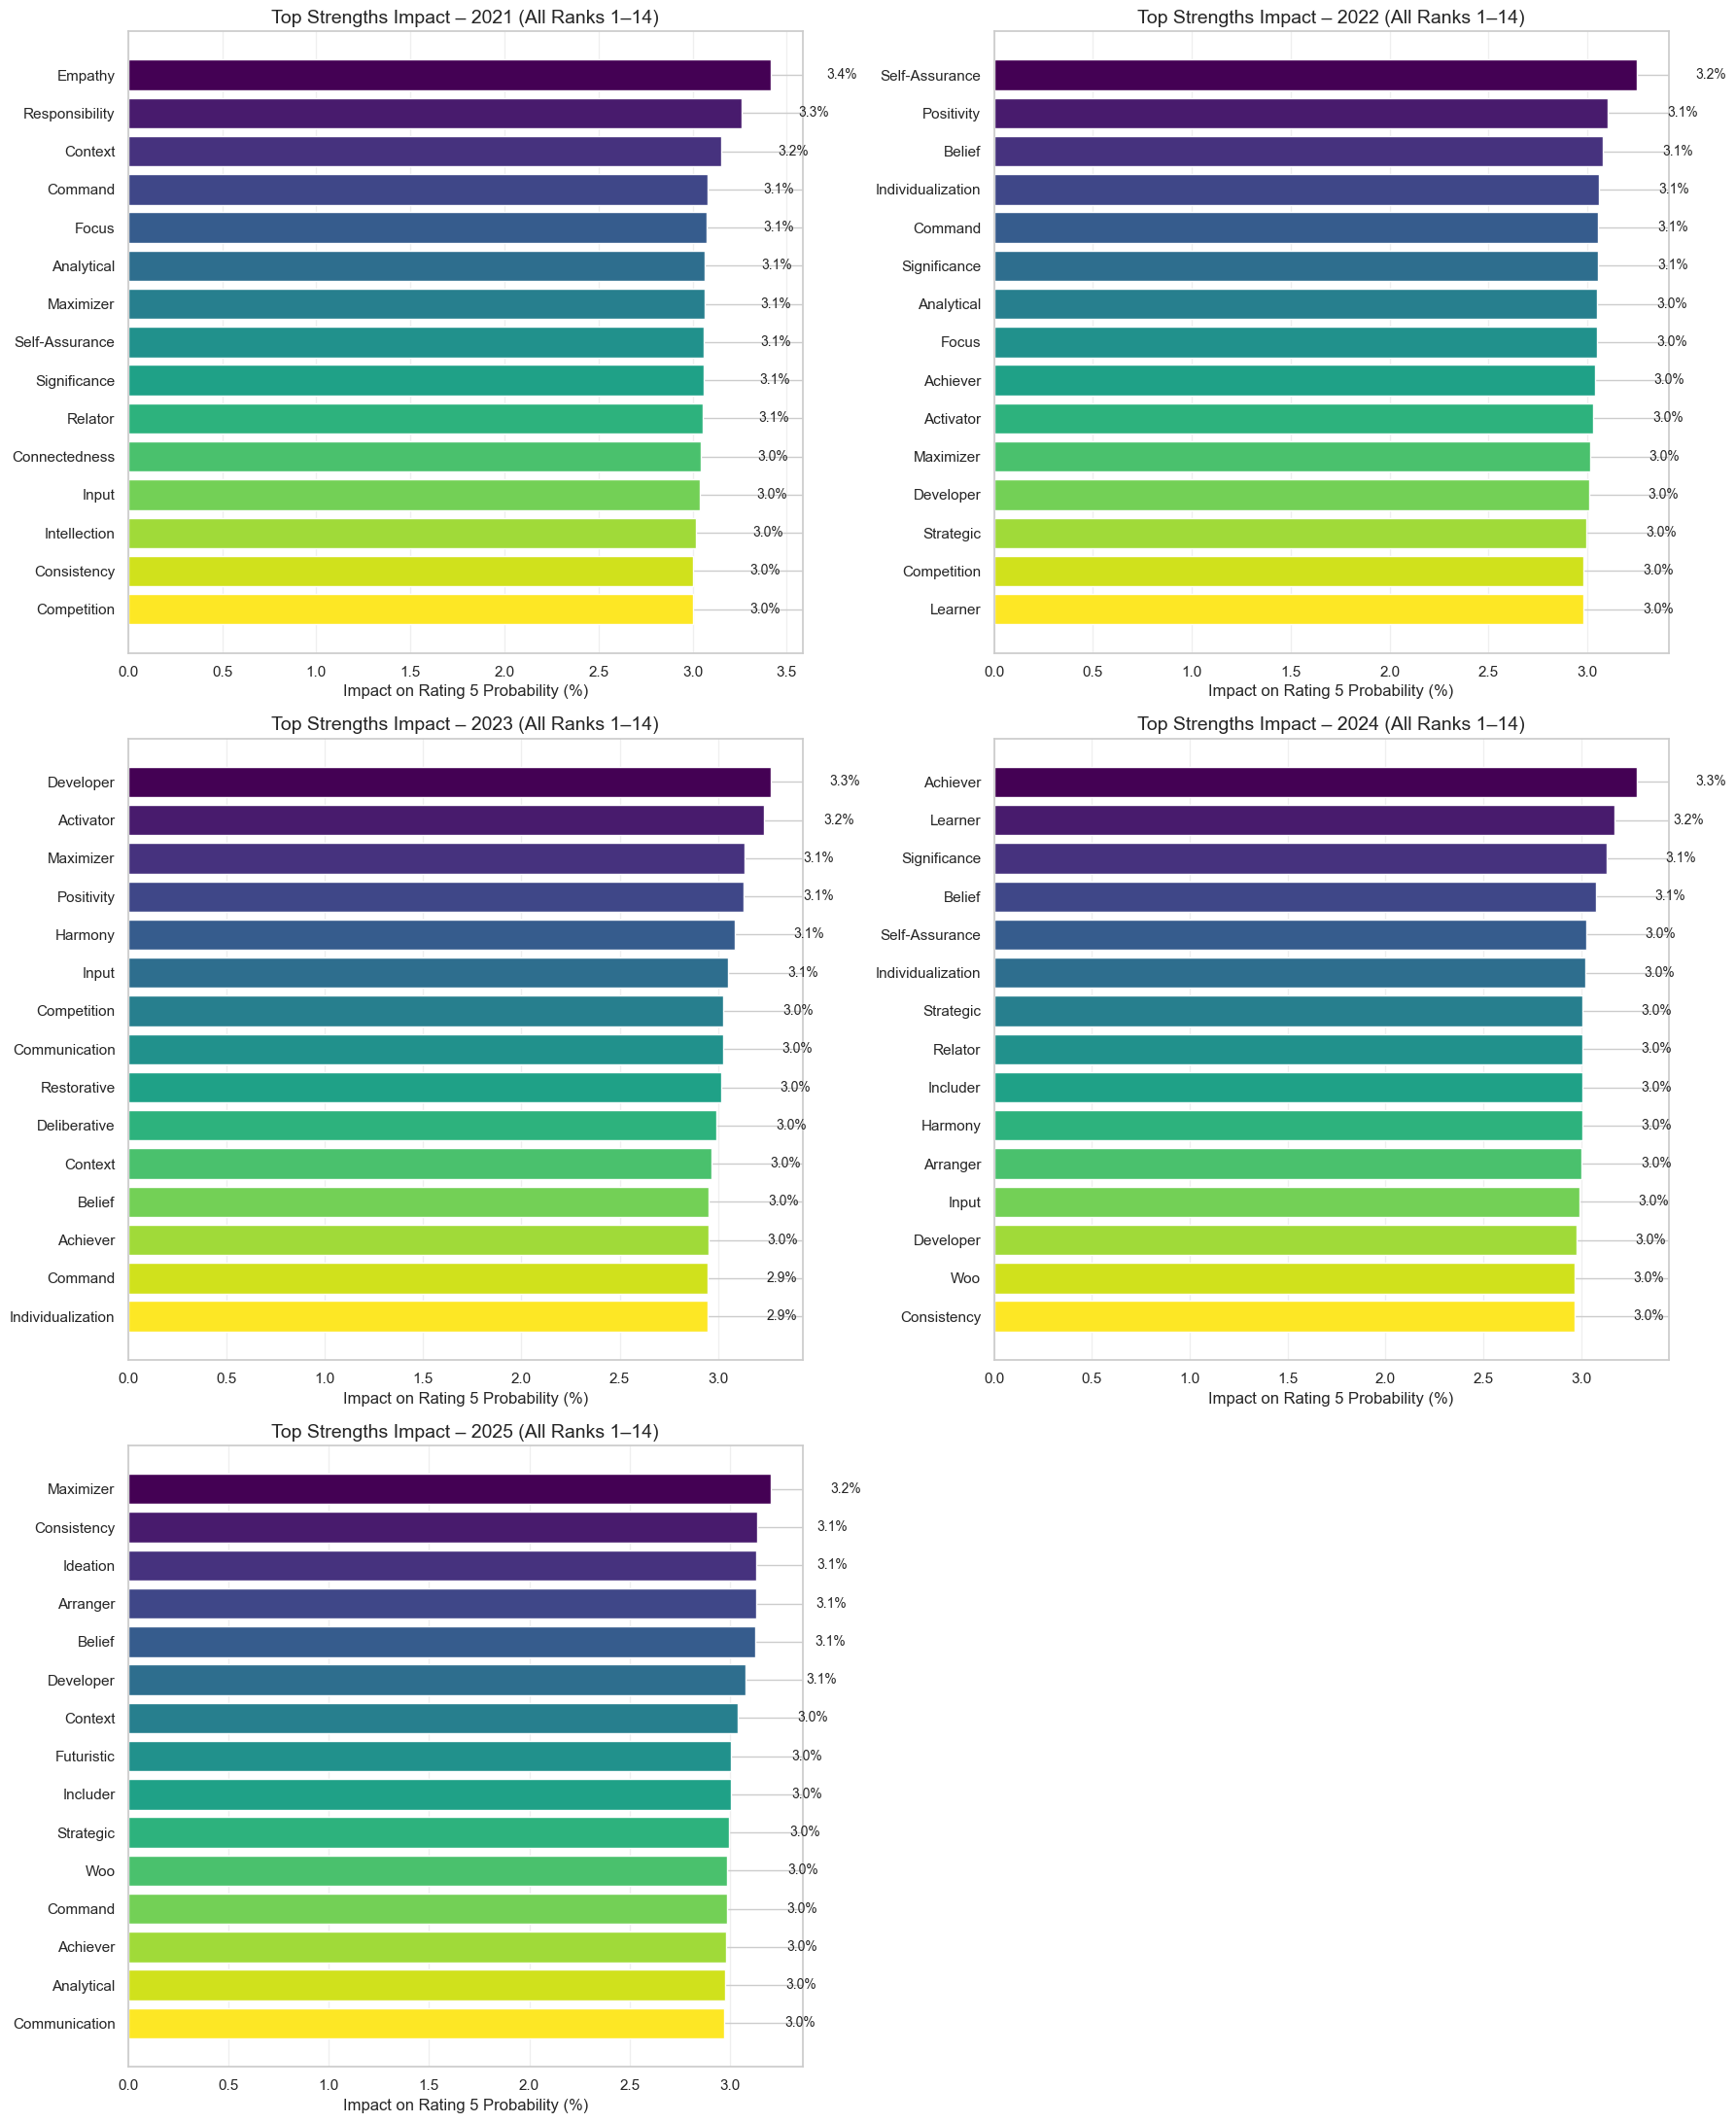

In [128]:
# =============================================================================
# COMBINED FEATURE IMPORTANCE SUBPLOTS (3×2 GRID + PERCENTAGE LABEL)
# =============================================================================

import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance_subplots_grid(rf_results):
    years = sorted(rf_results.keys())
    
    fig, axes = plt.subplots(3, 2, figsize=(18, 22))
    axes = axes.flatten()  # jadikan 1 list

    for idx, year in enumerate(years):
        ax = axes[idx]
        importance_df = rf_results[year]['importance'].head(15)

        # Warna
        colors = plt.cm.viridis(np.linspace(0, 1, len(importance_df)))

        # Plot bar
        bars = ax.barh(importance_df['strength'], importance_df['impact_pct'], color=colors)
        ax.set_title(f"Top Strengths Impact – {year} (All Ranks 1–14)", fontsize=14)
        ax.set_xlabel("Impact on Rating 5 Probability (%)", fontsize=12)
        ax.invert_yaxis()
        ax.grid(axis='x', alpha=0.3)

        # Tambahkan label persentase
        for bar, value in zip(bars, importance_df['impact_pct']):
            ax.text(
                bar.get_width() + 0.3,
                bar.get_y() + bar.get_height()/2,
                f"{value:.1f}%",
                va='center', fontsize=10
            )

    # Jika slot subplot lebih dari jumlah tahun → kosongkan
    for j in range(len(years), len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# Jalankan plot 3×2
plot_feature_importance_subplots_grid(rf_results_all_ranks)


Running Comprehensive Random Forest Analysis for All Years...
Processing 2021...
Processing 2022...
Processing 2023...
Processing 2024...
Processing 2025...


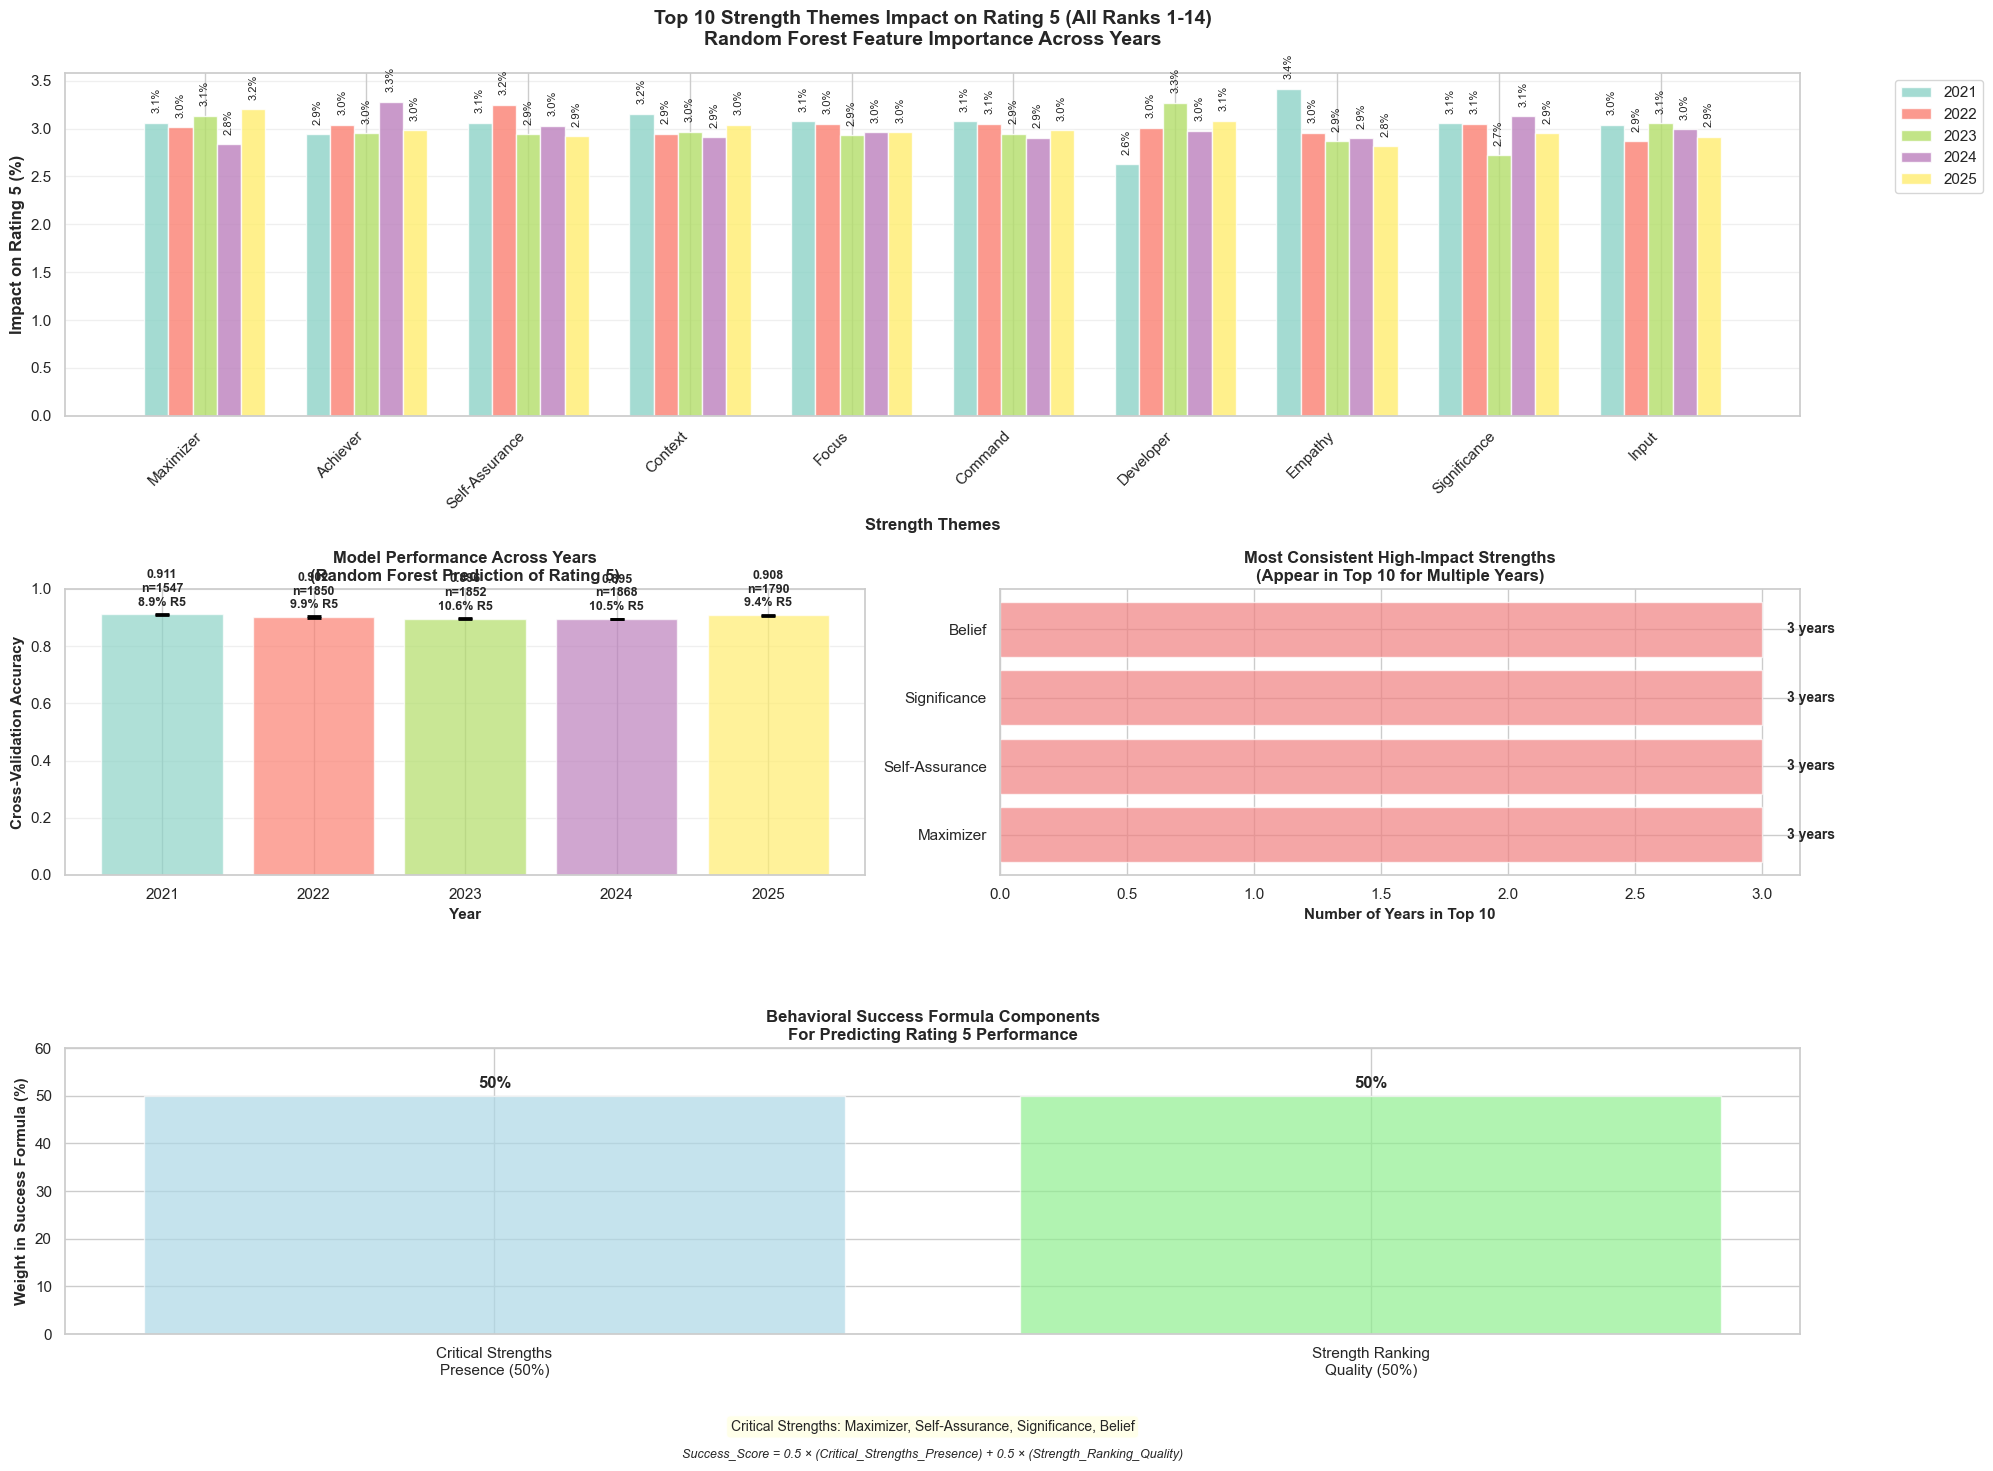


SUMMARY STATISTICS - BEHAVIORAL DATA ANALYSIS

Overall Performance:
Average Cross-Validation Accuracy: 0.903

Sample Sizes:
  2021: 1547 employees
  2022: 1850 employees
  2023: 1852 employees
  2024: 1868 employees
  2025: 1790 employees

Rating 5 Prevalence:
  2021: 8.9%
  2022: 9.9%
  2023: 10.6%
  2024: 10.5%
  2025: 9.4%

Most Consistent Critical Strengths:
  Maximizer: 3 years, 3.0% avg impact
  Self-Assurance: 3 years, 3.0% avg impact
  Significance: 3 years, 3.0% avg impact
  Belief: 3 years, 3.0% avg impact

DETAILED YEAR-BY-YEAR ANALYSIS

2021:
  Accuracy: 0.911 (+/- 0.003)
  Sample Size: 1547
  Rating 5 Rate: 8.9%
  Top 5 Strengths:
    Empathy: 3.4%
    Responsibility: 3.3%
    Context: 3.2%
    Command: 3.1%
    Focus: 3.1%

2022:
  Accuracy: 0.902 (+/- 0.004)
  Sample Size: 1850
  Rating 5 Rate: 9.9%
  Top 5 Strengths:
    Self-Assurance: 3.2%
    Positivity: 3.1%
    Belief: 3.1%
    Individualization: 3.1%
    Command: 3.1%

2023:
  Accuracy: 0.896 (+/- 0.004)
  Sample

In [129]:
# =============================================================================
# COMPREHENSIVE RANDOM FOREST ANALYSIS - ALL IN ONE PLOT
# =============================================================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def comprehensive_rf_analysis_all_years():
    """
    Analisis komprehensif Random Forest untuk semua tahun dalam satu plot
    """
    # Setup figure dengan subplots
    fig = plt.figure(figsize=(20, 15))
    
    # Define grid layout
    gs = fig.add_gridspec(3, 2, height_ratios=[1.2, 1, 1])
    
    # Subplots
    ax1 = fig.add_subplot(gs[0, :])  # Feature importance semua tahun
    ax2 = fig.add_subplot(gs[1, 0])  # Model performance
    ax3 = fig.add_subplot(gs[1, 1])  # Consistent strengths
    ax4 = fig.add_subplot(gs[2, :])  # Success formula components
    
    # Colors
    years = [2021, 2022, 2023, 2024, 2025]
    colors = plt.cm.Set3(np.linspace(0, 1, len(years)))
    
    rf_results = {}
    all_importance_data = {}
    
    # =========================================================================
    # 1. COLLECT DATA UNTUK SEMUA TAHUN
    # =========================================================================
    for i, year in enumerate(years):
        df_name = f"per_behave_{year}"
        if df_name in globals():
            print(f"Processing {year}...")
            merged_df = globals()[df_name]
            
            # Prepare data
            merged_df = merged_df.copy()
            merged_df['is_rating_5'] = (merged_df['rating'] == 5).astype(int)
            
            # Create features - semua ranks
            all_rank_cols = [f'strength_rank_{i}' for i in range(1, 15)]
            available_cols = [col for col in all_rank_cols if col in merged_df.columns]
            
            strength_long = merged_df.melt(
                id_vars=['employee_id', 'is_rating_5'],
                value_vars=available_cols,
                value_name='theme'
            ).dropna()
            
            binary_features = pd.crosstab(strength_long['employee_id'], strength_long['theme']).clip(0, 1)
            X = binary_features
            y = merged_df.set_index('employee_id').loc[binary_features.index]['is_rating_5']
            
            # Train Random Forest
            rf_model = RandomForestClassifier(
                n_estimators=200, random_state=42, max_depth=10, 
                min_samples_split=5, class_weight='balanced'
            )
            
            cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
            rf_model.fit(X, y)
            
            # Feature importance
            importance_df = pd.DataFrame({
                'strength': X.columns,
                'importance': rf_model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            importance_df['impact_pct'] = (importance_df['importance'] / importance_df['importance'].sum()) * 100
            
            rf_results[year] = {
                'model': rf_model,
                'importance': importance_df,
                'cv_accuracy': cv_scores.mean(),
                'cv_std': cv_scores.std(),
                'sample_size': len(X),
                'rating_5_rate': y.mean()
            }
            
            all_importance_data[year] = importance_df.set_index('strength')['impact_pct']
    
    if not rf_results:
        print("No data available for analysis")
        return
    
    # =========================================================================
    # 2. PLOT 1: FEATURE IMPORTANCE ACROSS YEARS (TOP 10 AVERAGE)
    # =========================================================================
    # Calculate average importance across years
    all_strengths = set()
    for year_data in all_importance_data.values():
        all_strengths.update(year_data.index)
    
    avg_importance = {}
    for strength in all_strengths:
        impacts = []
        for year_data in all_importance_data.values():
            if strength in year_data.index:
                impacts.append(year_data[strength])
        if impacts:
            avg_importance[strength] = np.mean(impacts)
    
    # Get top 10 average strengths
    top_10_avg = sorted(avg_importance.items(), key=lambda x: x[1], reverse=True)[:10]
    strengths_ordered = [s[0] for s in top_10_avg]
    
    # Plot feature importance for each year
    bar_width = 0.15
    x_pos = np.arange(len(strengths_ordered))
    
    for i, year in enumerate(rf_results.keys()):
        year_impacts = []
        for strength in strengths_ordered:
            if strength in all_importance_data[year]:
                year_impacts.append(all_importance_data[year][strength])
            else:
                year_impacts.append(0)
        
        ax1.bar(x_pos + i * bar_width, year_impacts, bar_width, 
                label=f'{year}', color=colors[i], alpha=0.8)
    
    ax1.set_xlabel('Strength Themes', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Impact on Rating 5 (%)', fontsize=12, fontweight='bold')
    ax1.set_title('Top 10 Strength Themes Impact on Rating 5 (All Ranks 1-14)\nRandom Forest Feature Importance Across Years', 
                  fontsize=14, fontweight='bold', pad=20)
    ax1.set_xticks(x_pos + bar_width * 2)
    ax1.set_xticklabels(strengths_ordered, rotation=45, ha='right')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, year in enumerate(rf_results.keys()):
        year_impacts = []
        for strength in strengths_ordered:
            if strength in all_importance_data[year]:
                year_impacts.append(all_importance_data[year][strength])
            else:
                year_impacts.append(0)
        
        for j, v in enumerate(year_impacts):
            if v > 0:  # Only label if value > 0
                ax1.text(x_pos[j] + i * bar_width, v + 0.1, f'{v:.1f}%', 
                        ha='center', va='bottom', fontsize=8, rotation=90)
    
    # =========================================================================
    # 3. PLOT 2: MODEL PERFORMANCE ACROSS YEARS
    # =========================================================================
    years_list = list(rf_results.keys())
    accuracies = [rf_results[year]['cv_accuracy'] for year in years_list]
    std_errors = [rf_results[year]['cv_std'] for year in years_list]
    sample_sizes = [rf_results[year]['sample_size'] for year in years_list]
    rating_5_rates = [rf_results[year]['rating_5_rate'] for year in years_list]
    
    bars1 = ax2.bar(years_list, accuracies, color=colors[:len(years_list)], alpha=0.7)
    ax2.errorbar(years_list, accuracies, yerr=std_errors, fmt='none', 
                color='black', capsize=5, capthick=2)
    
    ax2.set_xlabel('Year', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Cross-Validation Accuracy', fontsize=11, fontweight='bold')
    ax2.set_title('Model Performance Across Years\n(Random Forest Prediction of Rating 5)', 
                  fontsize=12, fontweight='bold')
    ax2.set_ylim(0, 1)
    ax2.grid(axis='y', alpha=0.3)
    
    # Add value labels and sample sizes
    for i, (bar, acc, size, rate) in enumerate(zip(bars1, accuracies, sample_sizes, rating_5_rates)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{acc:.3f}\nn={size}\n{rate:.1%} R5', ha='center', va='bottom', 
                fontsize=9, fontweight='bold')
    
    # =========================================================================
    # 4. PLOT 3: CONSISTENT STRENGTHS ANALYSIS
    # =========================================================================
    # Find strengths that appear in top 10 for at least 3 years
    strength_year_count = {}
    for strength in all_strengths:
        count = 0
        for year_data in rf_results.values():
            top_10_strengths = year_data['importance'].head(10)['strength'].tolist()
            if strength in top_10_strengths:
                count += 1
        strength_year_count[strength] = count
    
    consistent_strengths = {s: c for s, c in strength_year_count.items() if c >= 3}
    consistent_strengths_sorted = sorted(consistent_strengths.items(), key=lambda x: x[1], reverse=True)
    
    if consistent_strengths_sorted:
        cons_strengths = [s[0] for s in consistent_strengths_sorted[:8]]  # Top 8 consistent
        cons_counts = [s[1] for s in consistent_strengths_sorted[:8]]
        
        bars2 = ax3.barh(range(len(cons_strengths)), cons_counts, color='lightcoral', alpha=0.7)
        ax3.set_yticks(range(len(cons_strengths)))
        ax3.set_yticklabels(cons_strengths)
        ax3.set_xlabel('Number of Years in Top 10', fontsize=11, fontweight='bold')
        ax3.set_title('Most Consistent High-Impact Strengths\n(Appear in Top 10 for Multiple Years)', 
                      fontsize=12, fontweight='bold')
        
        # Add value labels
        for i, (bar, count) in enumerate(zip(bars2, cons_counts)):
            width = bar.get_width()
            ax3.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
                    f'{count} years', va='center', fontsize=10, fontweight='bold')
    
    # =========================================================================
    # 5. PLOT 4: SUCCESS FORMULA BREAKDOWN
    # =========================================================================
    if consistent_strengths_sorted:
        # Use top 5 consistent strengths for success formula
        critical_strengths = [s[0] for s in consistent_strengths_sorted[:5]]
        
        # Calculate average impact for these strengths
        avg_impacts = []
        for strength in critical_strengths:
            impacts = []
            for year_data in all_importance_data.values():
                if strength in year_data.index:
                    impacts.append(year_data[strength])
            avg_impacts.append(np.mean(impacts) if impacts else 0)
        
        # Success formula visualization
        components = ['Critical Strengths\nPresence (50%)', 'Strength Ranking\nQuality (50%)']
        weights = [50, 50]
        
        bars3 = ax4.bar(components, weights, color=['lightblue', 'lightgreen'], alpha=0.7)
        ax4.set_ylabel('Weight in Success Formula (%)', fontsize=11, fontweight='bold')
        ax4.set_title('Behavioral Success Formula Components\nFor Predicting Rating 5 Performance', 
                      fontsize=12, fontweight='bold')
        ax4.set_ylim(0, 60)
        
        # Add value labels
        for bar, weight in zip(bars3, weights):
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{weight}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
        
        # Add critical strengths list
        ax4.text(0.5, -0.3, f'Critical Strengths: {", ".join(critical_strengths)}', 
                transform=ax4.transAxes, ha='center', va='top', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7))
        
        # Add formula text
        formula_text = "Success_Score = 0.5 × (Critical_Strengths_Presence) + 0.5 × (Strength_Ranking_Quality)"
        ax4.text(0.5, -0.4, formula_text, transform=ax4.transAxes, 
                ha='center', va='top', fontsize=9, style='italic')
    
    # =========================================================================
    # 6. FINAL TOUCHES
    # =========================================================================
    plt.tight_layout()
    plt.show()
    
    # =========================================================================
    # 7. PRINT SUMMARY STATISTICS
    # =========================================================================
    print(f"\n{'='*80}")
    print("SUMMARY STATISTICS - BEHAVIORAL DATA ANALYSIS")
    print(f"{'='*80}")
    
    print(f"\nOverall Performance:")
    avg_accuracy = np.mean([rf_results[year]['cv_accuracy'] for year in rf_results.keys()])
    print(f"Average Cross-Validation Accuracy: {avg_accuracy:.3f}")
    
    print(f"\nSample Sizes:")
    for year in rf_results.keys():
        print(f"  {year}: {rf_results[year]['sample_size']} employees")
    
    print(f"\nRating 5 Prevalence:")
    for year in rf_results.keys():
        print(f"  {year}: {rf_results[year]['rating_5_rate']:.1%}")
    
    if consistent_strengths_sorted:
        print(f"\nMost Consistent Critical Strengths:")
        for strength, count in consistent_strengths_sorted[:5]:
            avg_impact = avg_importance.get(strength, 0)
            print(f"  {strength}: {count} years, {avg_impact:.1f}% avg impact")
    
    return rf_results

# =============================================================================
# RUN COMPREHENSIVE ANALYSIS
# =============================================================================
print("Running Comprehensive Random Forest Analysis for All Years...")
rf_final_results = comprehensive_rf_analysis_all_years()

# =============================================================================
# ADDITIONAL DETAILED ANALYSIS (OPTIONAL)
# =============================================================================
if rf_final_results:
    def print_detailed_analysis(rf_results):
        print(f"\n{'='*80}")
        print("DETAILED YEAR-BY-YEAR ANALYSIS")
        print(f"{'='*80}")
        
        for year, results in rf_results.items():
            print(f"\n{year}:")
            print(f"  Accuracy: {results['cv_accuracy']:.3f} (+/- {results['cv_std'] * 2:.3f})")
            print(f"  Sample Size: {results['sample_size']}")
            print(f"  Rating 5 Rate: {results['rating_5_rate']:.1%}")
            
            print(f"  Top 5 Strengths:")
            top_5 = results['importance'].head(5)
            for _, row in top_5.iterrows():
                print(f"    {row['strength']}: {row['impact_pct']:.1f}%")
    
    print_detailed_analysis(rf_final_results)